In [2]:
import importlib
import ntuputils, trees
import numpy as np, os.path as osp, matplotlib.pyplot as plt

   INFO:2020-11-30 10:51:50:ntuputils:40 Using tqdm notebook


In [3]:
importlib.reload(ntuputils)
event = ntuputils.get_event('event1009_pdgid13_1000GeV_Nov10_finecalo_numEvent5_numEvent5.root', i=0)

   INFO:2020-11-30 10:51:50:ntuputils:17 Logger hgcalplot is already defined
   INFO:2020-11-30 10:51:50:ntuputils:40 Using tqdm notebook
   INFO:2020-11-30 10:51:50:ntuputils:161 Overwriting cache for <ntuputils.Dataset (1 root files) object at 0x10a32c8e0>


   INFO:2020-11-30 10:51:50:ntuputils:171 Cached ~677.6 kb (5 entries, 53 branches)
   INFO:2020-11-30 10:51:50:ntuputils:128 Using cache


In [4]:
importlib.reload(trees)
roots = trees.build_tree(event)
root = roots[1]

   INFO:2020-11-30 10:51:50:trees:170 Adding <trees.Track 1 E=5269.00 (0.000,0.000,-0.000) pdgid=-13 at 0x10a44f0a0> as a root
   INFO:2020-11-30 10:51:50:trees:170 Adding <trees.Track 2 E=5269.00 (0.000,0.000,-0.000) pdgid=13 at 0x10a256580> as a root


In [5]:
trees.print_tree(root)

2 E=5269.00 pdg=13 nhits=878 X
__13 E=2.08 pdg=11  
____139656 E=0.04 pdg=22 nhits=1 X
____139659 E=0.05 pdg=22 nhits=1 X
____139660 E=0.87 pdg=22  
______141142 E=0.86 pdg=-11 nhits=2 X
________141145 E=0.15 pdg=22  
__________142156 E=0.11 pdg=11 nhits=2 X
____________142207 E=0.05 pdg=22 nhits=1 X
__________142157 E=0.04 pdg=-11 nhits=1 X
________141149 E=0.04 pdg=22 nhits=2 X
________141150 E=0.44 pdg=22  
__________141429 E=0.26 pdg=11 nhits=7 X
____________141677 E=0.03 pdg=22 nhits=3 X
____________141678 E=0.04 pdg=22 nhits=1 X
__________141430 E=0.18 pdg=-11 nhits=11 X
________141155 E=0.02 pdg=22 nhits=3 X
________141156 E=0.12 pdg=22 nhits=4 X
____139661 E=1.08 pdg=11  
______139663 E=0.05 pdg=22 nhits=1 X
______139696 E=0.29 pdg=22 nhits=7 X
______139704 E=0.60 pdg=22  
________139710 E=0.10 pdg=11 nhits=1 X
________139711 E=0.49 pdg=-11 nhits=12 X
__________139714 E=0.03 pdg=22 nhits=2 X
__________139715 E=0.14 pdg=22 nhits=5 X
__________139717 E=0.10 pdg=22  
____________1

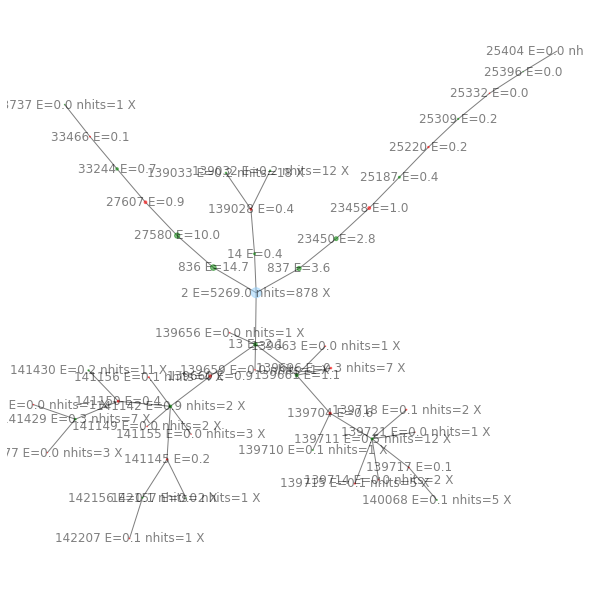

In [6]:
importlib.reload(trees)
trees.plot_graph(root, prog='neato')

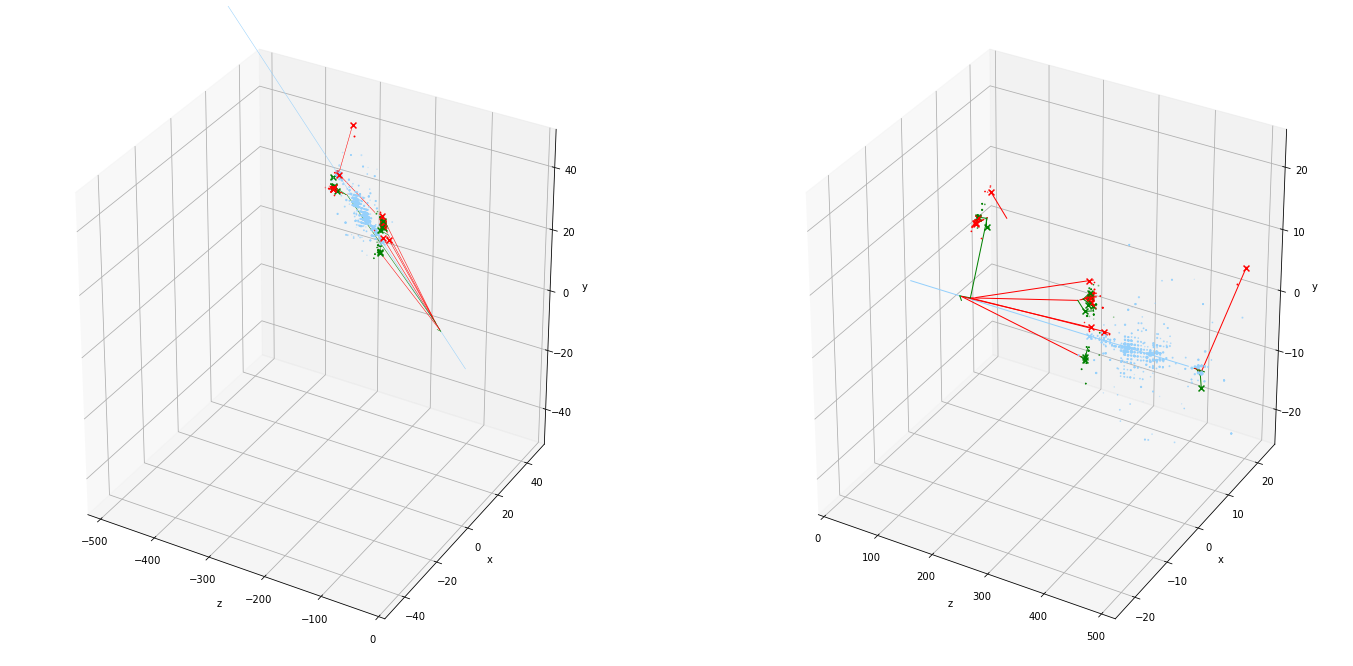

In [7]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

labels=False
trees.plot_node(root, labels=labels, ax=ax1)
trees.plot_node_rotated(root, labels=labels, ax=ax2)

Focusing on subtree starting with track 13:

13 E=2.08 pdg=11  
__139656 E=0.04 pdg=22 nhits=1 X
__139659 E=0.05 pdg=22 nhits=1 X
__139660 E=0.87 pdg=22  
____141142 E=0.86 pdg=-11 nhits=2 X
______141145 E=0.15 pdg=22  
________142156 E=0.11 pdg=11 nhits=2 X
__________142207 E=0.05 pdg=22 nhits=1 X
________142157 E=0.04 pdg=-11 nhits=1 X
______141149 E=0.04 pdg=22 nhits=2 X
______141150 E=0.44 pdg=22  
________141429 E=0.26 pdg=11 nhits=7 X
__________141677 E=0.03 pdg=22 nhits=3 X
__________141678 E=0.04 pdg=22 nhits=1 X
________141430 E=0.18 pdg=-11 nhits=11 X
______141155 E=0.02 pdg=22 nhits=3 X
______141156 E=0.12 pdg=22 nhits=4 X
__139661 E=1.08 pdg=11  
____139663 E=0.05 pdg=22 nhits=1 X
____139696 E=0.29 pdg=22 nhits=7 X
____139704 E=0.60 pdg=22  
______139710 E=0.10 pdg=11 nhits=1 X
______139711 E=0.49 pdg=-11 nhits=12 X
________139714 E=0.03 pdg=22 nhits=2 X
________139715 E=0.14 pdg=22 nhits=5 X
________139717 E=0.10 pdg=22  
__________140068 E=0.09 pdg=-11 nhits=5 X
________139718 E=0.10 pdg=22 nhits=2 X
________139721 

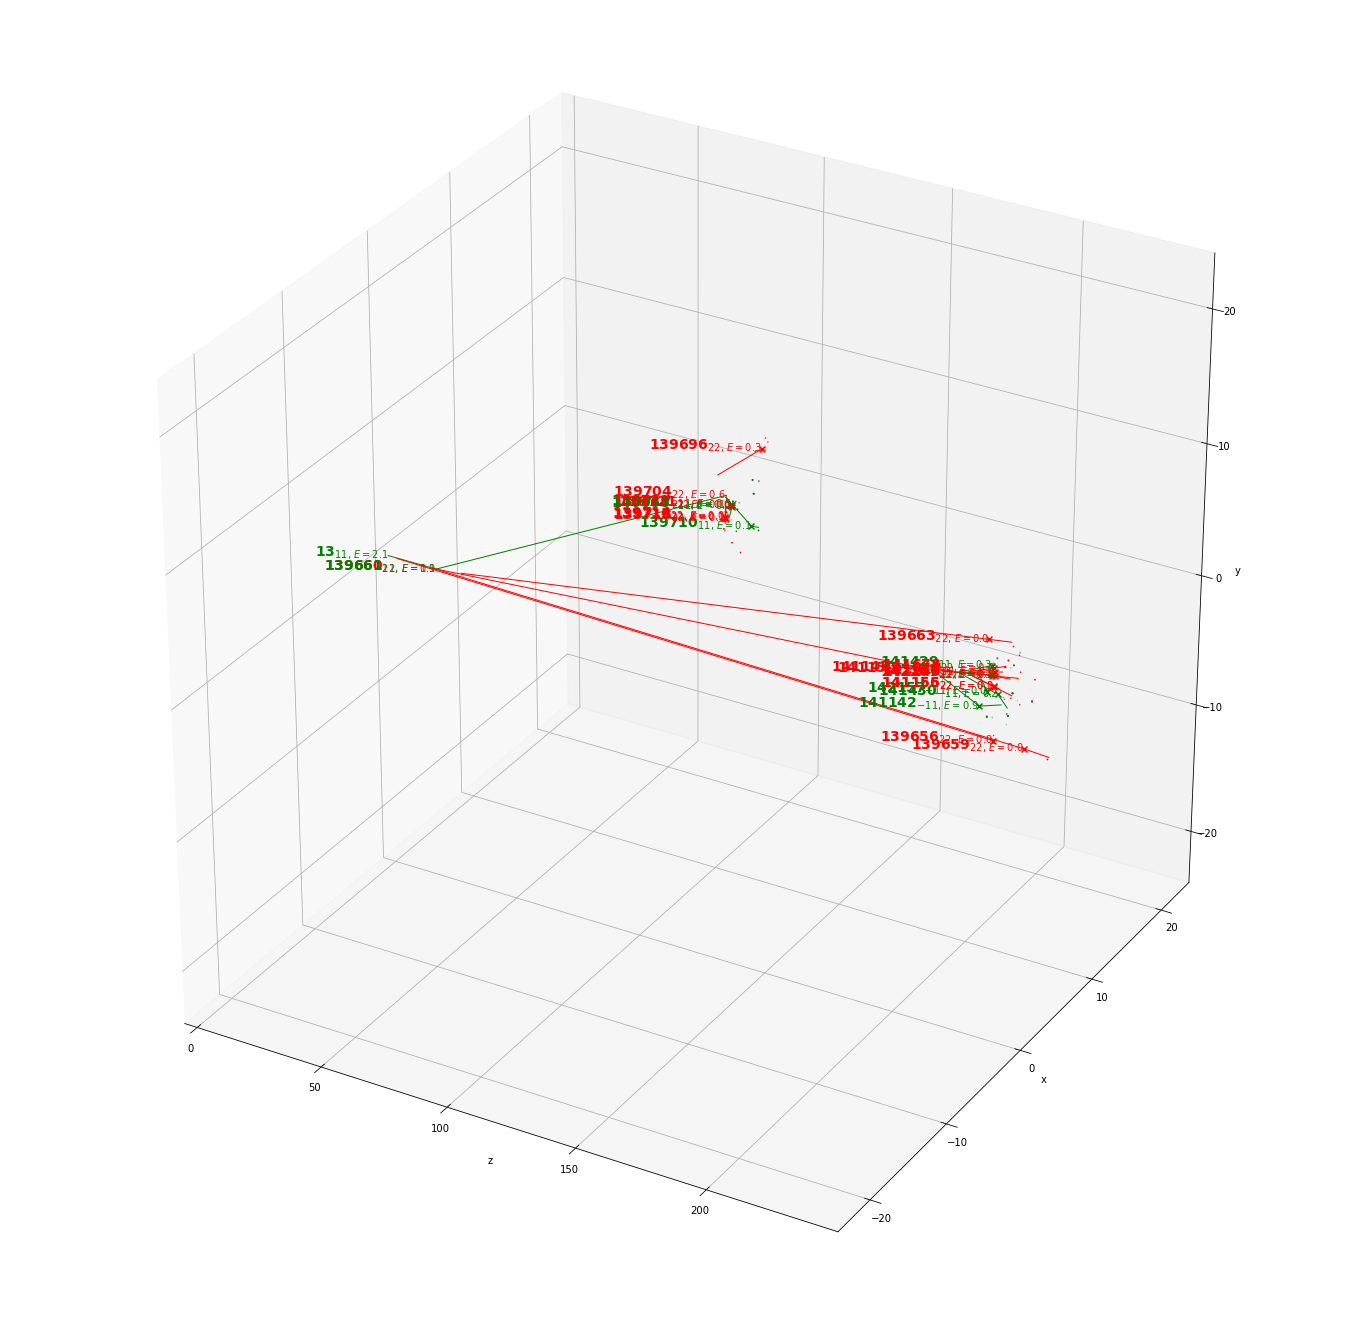

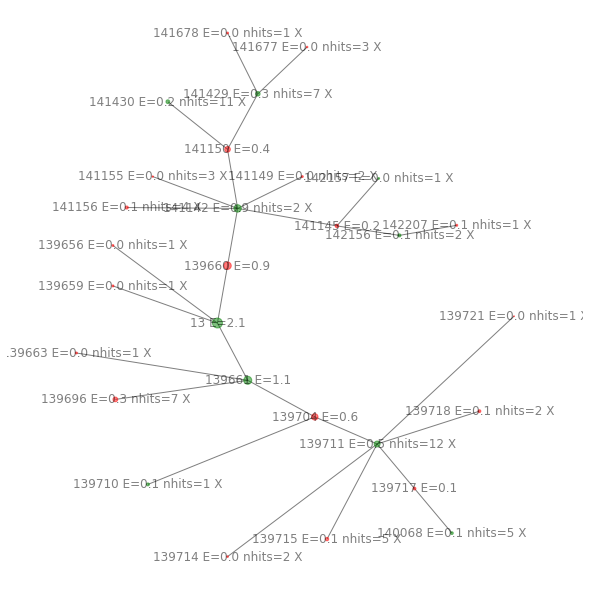

In [8]:
track13 = root.get_by_id(13)
trees.plot_node_rotated(track13, labels=True)
trees.plot_graph(track13)
track13.print()

# Trying merging algos

In [9]:
class Cluster(object):
    def __init__(self, track):
        print('New cluster with source', track)
        self.source_track = track
        self.source_track.cluster = self
        self.tracks = [track]
        
    def hits(self):
        for track in self.tracks:
            for hit in track.hits:
                yield hit

def merge(track):
    for ancestor in track.traverse_up():
        if hasattr(ancestor, 'cluster'):
            ancestor.cluster.tracks.append(track)
            print('Merging {} into {}'.format(track, ancestor))
            break
    else:
        raise Exception('No ancestor with a cluster for track {}'.format(track.trackid))
        
def print_clusters(root):
    for node, depth in trees.traverse(root, yield_depth=True):
        if not hasattr(node, 'cluster'): continue
        print('__'*depth + repr(node))
        

In [10]:
importlib.reload(trees)
for node, depth in trees.traverse_postorder(root, yield_depth=True):
    print('__'*depth + repr(node))

____<trees.Track 139656 E=0.04 (17.957,-1.781,-93.352) pdgid=22 at 0x10a59fa30>
____<trees.Track 139659 E=0.05 (20.840,-1.877,-108.353) pdgid=22 at 0x10a59fbe0>
____________<trees.Track 142207 E=0.05 (61.611,-0.135,-318.557) pdgid=22 at 0x10a5b9b50>
__________<trees.Track 142156 E=0.11 (61.009,-0.306,-314.827) pdgid=11 at 0x10a5b97f0>
__________<trees.Track 142157 E=0.04 (61.009,-0.306,-314.827) pdgid=-11 at 0x10a5b99a0>
________<trees.Track 141145 E=0.15 (58.426,-0.647,-301.854) pdgid=22 at 0x10a5aeee0>
________<trees.Track 141149 E=0.04 (58.913,-0.586,-304.298) pdgid=22 at 0x10a5b1910>
____________<trees.Track 141677 E=0.03 (59.698,-0.462,-308.211) pdgid=22 at 0x10a5b5880>
____________<trees.Track 141678 E=0.04 (60.263,-0.295,-311.066) pdgid=22 at 0x10a5b5a30>
__________<trees.Track 141429 E=0.26 (59.510,-0.494,-307.310) pdgid=11 at 0x10a5b1fa0>
__________<trees.Track 141430 E=0.18 (59.510,-0.494,-307.310) pdgid=-11 at 0x10a5b1f10>
________<trees.Track 141150 E=0.44 (58.934,-0.583,-3

2 e=5269.00 CLUSTER
__13 dr=0.00 efrac=0.00 e=2.08
____139656 dr=0.03 efrac=0.02 e=0.04
____139659 dr=0.11 efrac=0.02 e=0.05
____139660 dr=0.13 efrac=0.42 e=0.87 CLUSTER
______141142 dr=0.00 efrac=0.99 e=0.86
________141145 dr=0.11 efrac=0.17 e=0.15
__________142156 dr=0.05 efrac=0.76 e=0.11
____________142207 dr=0.61 efrac=0.45 e=0.05
__________142157 dr=0.07 efrac=0.24 e=0.04
________141149 dr=0.10 efrac=0.05 e=0.04
________141150 dr=0.13 efrac=0.51 e=0.44 CLUSTER
__________141429 dr=0.00 efrac=0.60 e=0.26
____________141677 dr=0.07 efrac=0.11 e=0.03
____________141678 dr=0.24 efrac=0.17 e=0.04
__________141430 dr=0.01 efrac=0.40 e=0.18
________141155 dr=0.27 efrac=0.03 e=0.02
________141156 dr=0.28 efrac=0.13 e=0.12
____139661 dr=0.13 efrac=0.52 e=1.08 CLUSTER
______139663 dr=0.09 efrac=0.05 e=0.05
______139696 dr=1.78 efrac=0.27 e=0.29
______139704 dr=2.49 efrac=0.56 e=0.60 CLUSTER
________139710 dr=0.03 efrac=0.17 e=0.10
________139711 dr=0.03 efrac=0.83 e=0.49
__________139714 dr

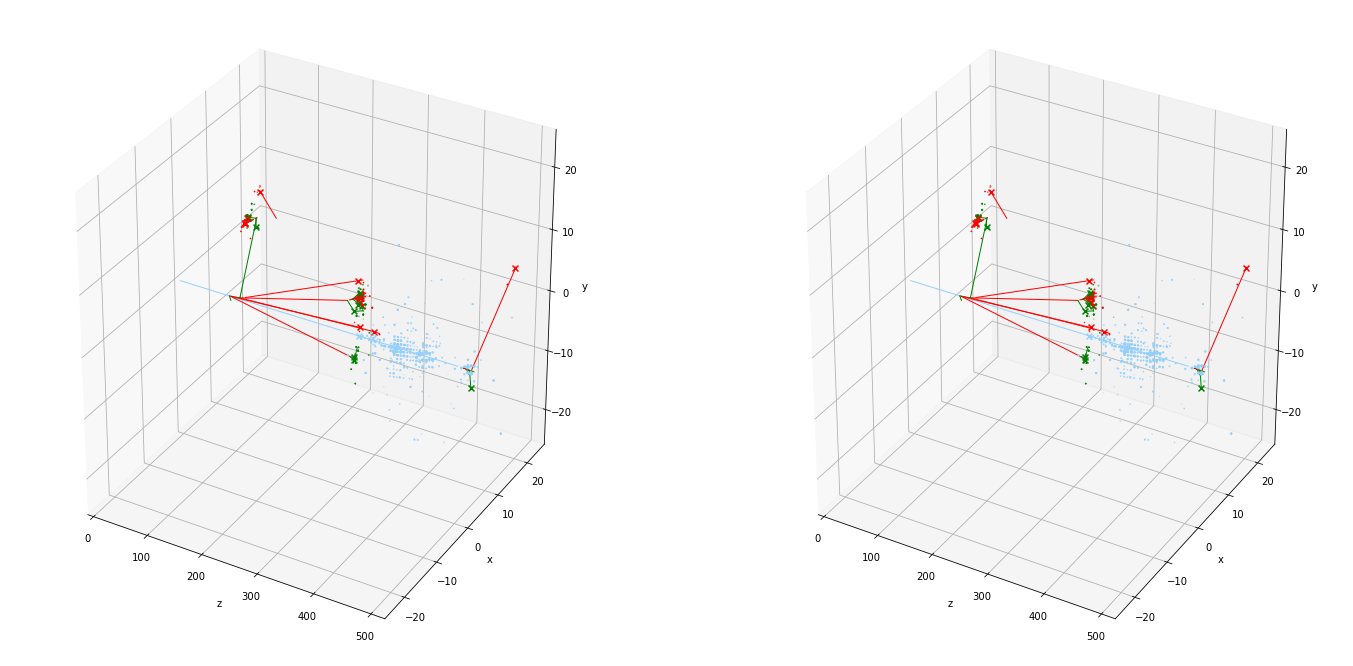

In [19]:
from math import pi

def deltar(eta1, phi1, eta2, phi2):
    dphi = phi1 - phi2
    # Some normalization of phi - first substract whole 2*pi's,
    # then flip to -pi < phi < pi regime
    if isinstance(dphi, float):
        if dphi > 2.*pi: dphi -= 2.*pi
        if dphi < -2.*pi: dphi += 2.*pi
        if dphi > pi: dphi -= 2.*pi
        if dphi < -pi: dphi += 2.*pi
    else:
        dphi[dphi > 2.*pi] -= 2.*pi
        dphi[dphi < -2.*pi] += 2.*pi
        dphi[dphi > pi] -= 2.*pi
        dphi[dphi < -pi] += 2.*pi
    dr = np.sqrt( dphi**2 + (eta1-eta2)**2 )
    return dr

def deltar_tracks(t1, t2):
    p1, p2 = t1.momentum, t2.momentum
    return deltar(p1.eta, p1.phi, p2.eta, p2.phi)

def hitcentroid(track):
    if track.nhits == 0: return None
    if track.nhits == 1: return np.array([track.hits[0].x, track.hits[0].y, track.hits[0].z])
    positions = np.array([ hit.energy * np.array([hit.x, hit.y, hit.z]) for hit in track.hits ])
    positions /= sum([ hit.energy for hit in track.hits ])
    centroid = positions.sum(axis=0)
    # Check if point on the track at same norm of centroid is approximately the same
    # print(centroid)
    # origin = np.array([track.vertex_x, track.vertex_y, track.vertex_z])
    # pos = np.array([track.x, track.y, track.z])
    # d = pos - origin
    # d = d / np.linalg.norm(d) * np.linalg.norm(centroid-origin)
    # print(d)
    return centroid

def merging_algo(node):
    for track in trees.traverse_postorder(node):
        if track.parent is None:
            track.merge = False
            continue            

        parent = track.parent
        track.merge = True

        efraction = track.energy / parent.energy
        dr = deltar_tracks(parent, track)

        if dr < 0.1:
            # Mostly colinear energy with the parent, so just merge it up
            pass            
        else:
            if track.energy > 1. or (track.energy > 0.4 and efraction > 0.3):
                track.merge = False

merging_algo(root)

fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

trees.plot_node_rotated(root, labels=False, ax=ax1)
trees.plot_node_rotated(root, labels=False, ax=ax2)

   INFO:2020-11-30 14:54:52:ntuputils:17 Logger hgcalplot is already defined
   INFO:2020-11-30 14:54:52:ntuputils:40 Using tqdm notebook


2 e=5269.00 CLUSTER
__13 dr=0.00 efrac=0.00 e=2.08
____139656 dr=0.03 efrac=0.02 e=0.04
____139659 dr=0.11 efrac=0.02 e=0.05
____139660 dr=0.13 efrac=0.42 e=0.87 CLUSTER
______141142 dr=0.00 efrac=0.99 e=0.86
________141145 dr=0.11 efrac=0.17 e=0.15
__________142156 dr=0.05 efrac=0.76 e=0.11
____________142207 dr=0.61 efrac=0.45 e=0.05
__________142157 dr=0.07 efrac=0.24 e=0.04
________141149 dr=0.10 efrac=0.05 e=0.04
________141150 dr=0.13 efrac=0.51 e=0.44
__________141429 dr=0.00 efrac=0.60 e=0.26
____________141677 dr=0.07 efrac=0.11 e=0.03
____________141678 dr=0.24 efrac=0.17 e=0.04
__________141430 dr=0.01 efrac=0.40 e=0.18
________141155 dr=0.27 efrac=0.03 e=0.02
________141156 dr=0.28 efrac=0.13 e=0.12
____139661 dr=0.13 efrac=0.52 e=1.08 CLUSTER
______139663 dr=0.09 efrac=0.05 e=0.05
______139696 dr=1.78 efrac=0.27 e=0.29
______139704 dr=2.49 efrac=0.56 e=0.60 CLUSTER
________139710 dr=0.03 efrac=0.17 e=0.10
________139711 dr=0.03 efrac=0.83 e=0.49
__________139714 dr=0.14 ef

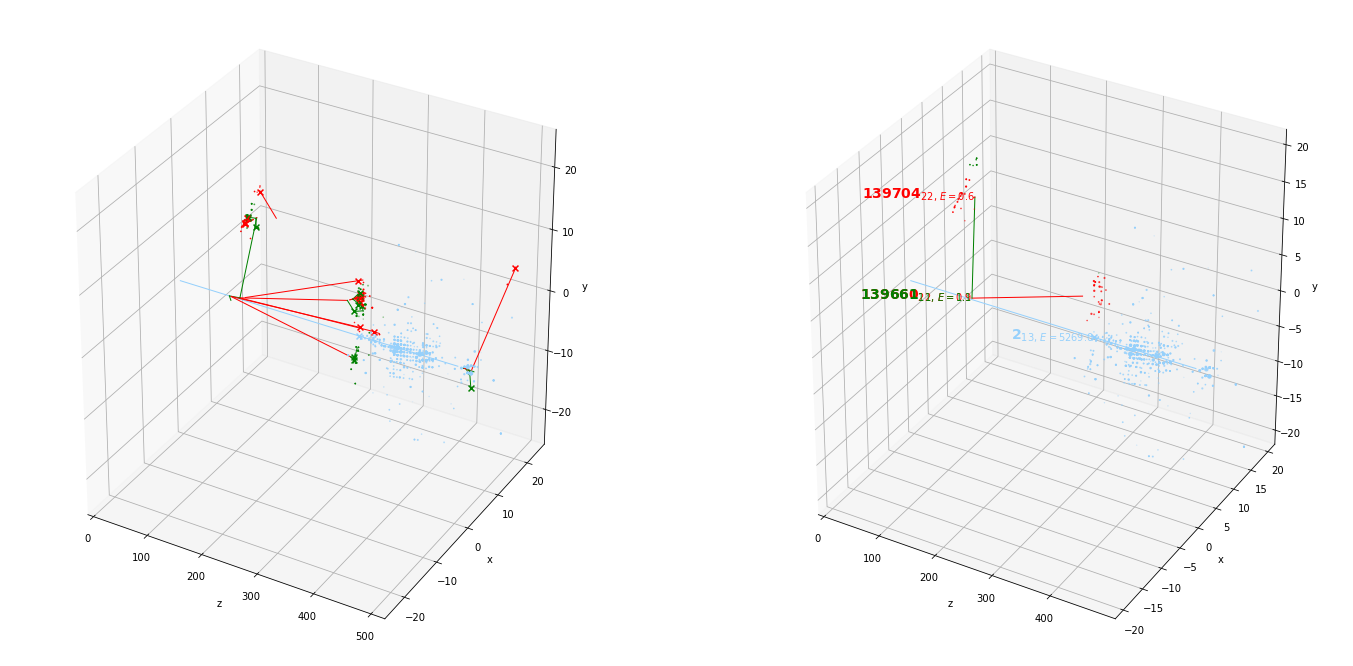

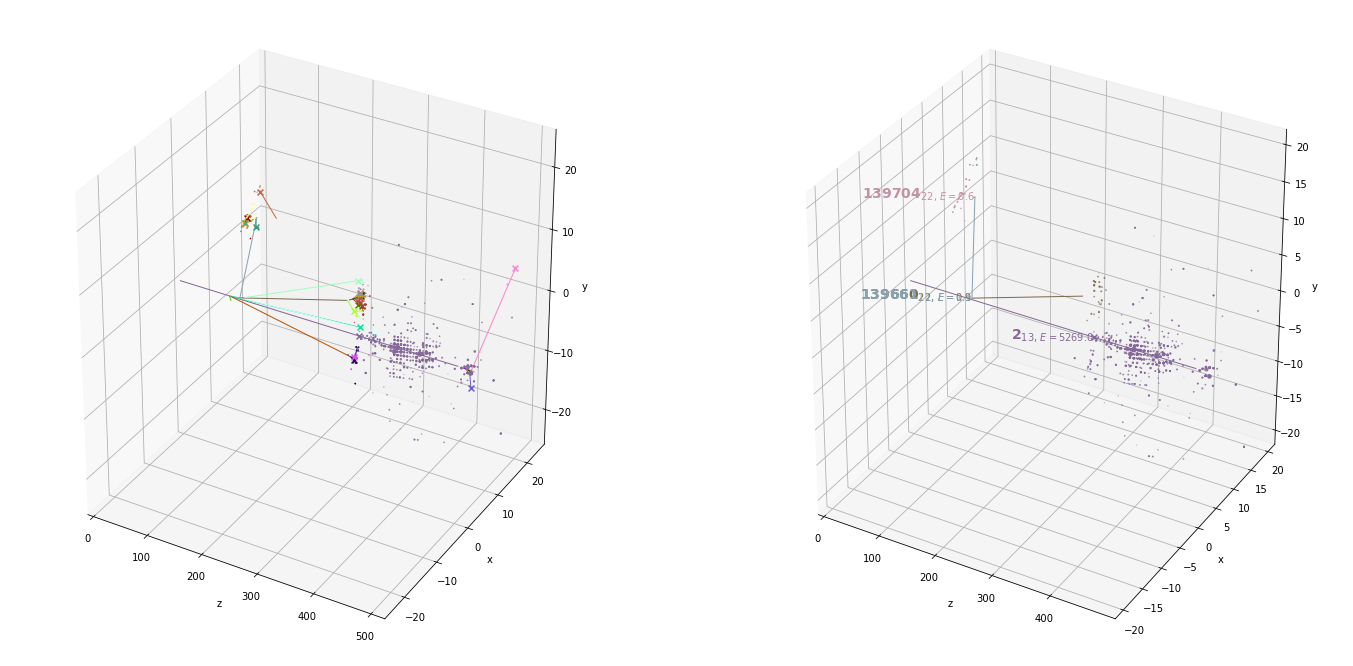

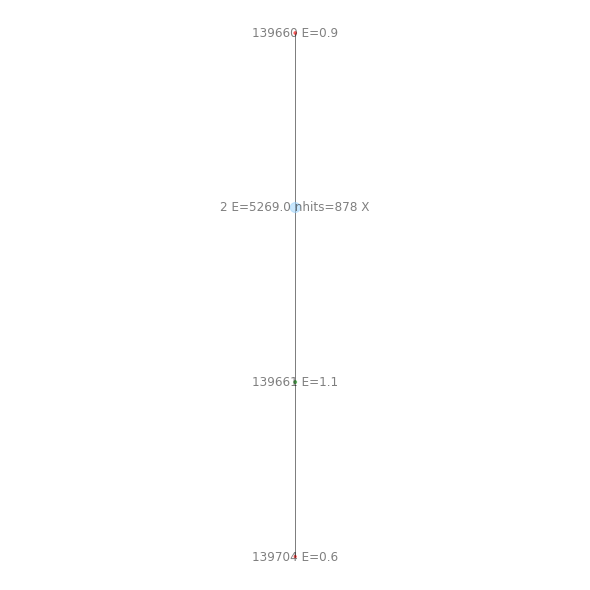

In [85]:
importlib.reload(ntuputils)
importlib.reload(trees)

@trees.clusterize_decorator
def merging_algo(node):
    for track in trees.traverse(node):
        if track.parent is None:
            track.merge = False
            continue

        parent = track.parent
        track.merge = True

        efraction = track.energy / parent.energy
        dr = trees.deltar_tracks(parent, track)

        # dr < 0.1 is mostly colinear energy with the parent, so just merge it up    
        if dr > 0.1:
            if track.energy > 1. or (track.energy > 0.5 and efraction > 0.3):
                track.merge = False

root_cluster = merging_algo(root)

trees.print_clustering(root)
print()
trees.print_tree(root_cluster)

fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
fig2 = plt.figure(figsize=(24,12))
ax3 = fig2.add_subplot(121, projection='3d')
ax4 = fig2.add_subplot(122, projection='3d')

trees.plot_node_rotated(root, labels=False, ax=ax1)
trees.plot_node_rotated(root_cluster, labels=True, plot_clusters=True, ax=ax2)

trees.plot_node_rotated(root, labels=False, ax=ax3, color_by_pdgid=False)
trees.plot_node_rotated(root_cluster, labels=True, plot_clusters=True, ax=ax4, color_by_pdgid=False)

trees.plot_graph(root_cluster)

In [57]:
for node in traverse_mergeable_daughters(root):
    print(node)

<trees.Track 2 E=5269.00 (0.000,0.000,-0.000) pdgid=13 at 0x10a256580>
<trees.Track 13 E=2.08 (17.285,-1.721,-89.864) pdgid=11 at 0x102cfcc10>
<trees.Track 139656 E=0.04 (17.957,-1.781,-93.352) pdgid=22 at 0x10a59fa30>
<trees.Track 139659 E=0.05 (20.840,-1.877,-108.353) pdgid=22 at 0x10a59fbe0>
<trees.Track 14 E=0.43 (17.285,-1.721,-89.864) pdgid=-11 at 0x10a32c310>
<trees.Track 139028 E=0.41 (17.917,-1.801,-93.179) pdgid=22 at 0x10a59bfa0>
<trees.Track 139032 E=0.19 (59.089,-8.968,-313.804) pdgid=11 at 0x10a59bf10>
<trees.Track 139033 E=0.22 (59.089,-8.968,-313.804) pdgid=-11 at 0x10a59bf70>
<trees.Track 836 E=14.69 (96.408,-9.555,-501.183) pdgid=11 at 0x10a40d760>
<trees.Track 27580 E=9.99 (96.471,-9.561,-501.511) pdgid=11 at 0x10a4f7ee0>
<trees.Track 27607 E=0.92 (97.121,-9.621,-504.916) pdgid=22 at 0x10a4fbbb0>
<trees.Track 33244 E=0.72 (97.172,-9.626,-505.181) pdgid=11 at 0x10a56ef40>
<trees.Track 33466 E=0.07 (97.730,-9.730,-508.051) pdgid=22 at 0x10a572f70>
<trees.Track 33737 E=

In [38]:
root_cluster.hits()

<generator object Cluster.hits at 0x182a0fdd0>

New cluster with source <trees.Track 2 E=5269.00 (0.000,0.000,-0.000) pdgid=13 at 0x17703f7c0>
Merging <trees.Track 139656 E=0.04 (17.957,-1.781,-93.352) pdgid=22 at 0x1775aa730> into <trees.Track 2 E=5269.00 (0.000,0.000,-0.000) pdgid=13 at 0x17703f7c0>
Merging <trees.Track 139659 E=0.05 (20.840,-1.877,-108.353) pdgid=22 at 0x1775aa8e0> into <trees.Track 2 E=5269.00 (0.000,0.000,-0.000) pdgid=13 at 0x17703f7c0>
New cluster with source <trees.Track 141142 E=0.86 (57.704,-0.756,-298.223) pdgid=-11 at 0x1775b9f10>
Merging <trees.Track 142156 E=0.11 (61.009,-0.306,-314.827) pdgid=11 at 0x1775c0f10> into <trees.Track 141142 E=0.86 (57.704,-0.756,-298.223) pdgid=-11 at 0x1775b9f10>
Merging <trees.Track 142207 E=0.05 (61.611,-0.135,-318.557) pdgid=22 at 0x1775c38b0> into <trees.Track 141142 E=0.86 (57.704,-0.756,-298.223) pdgid=-11 at 0x1775b9f10>
Merging <trees.Track 142157 E=0.04 (61.009,-0.306,-314.827) pdgid=-11 at 0x1775c0f70> into <trees.Track 141142 E=0.86 (57.704,-0.756,-298.223) pdg

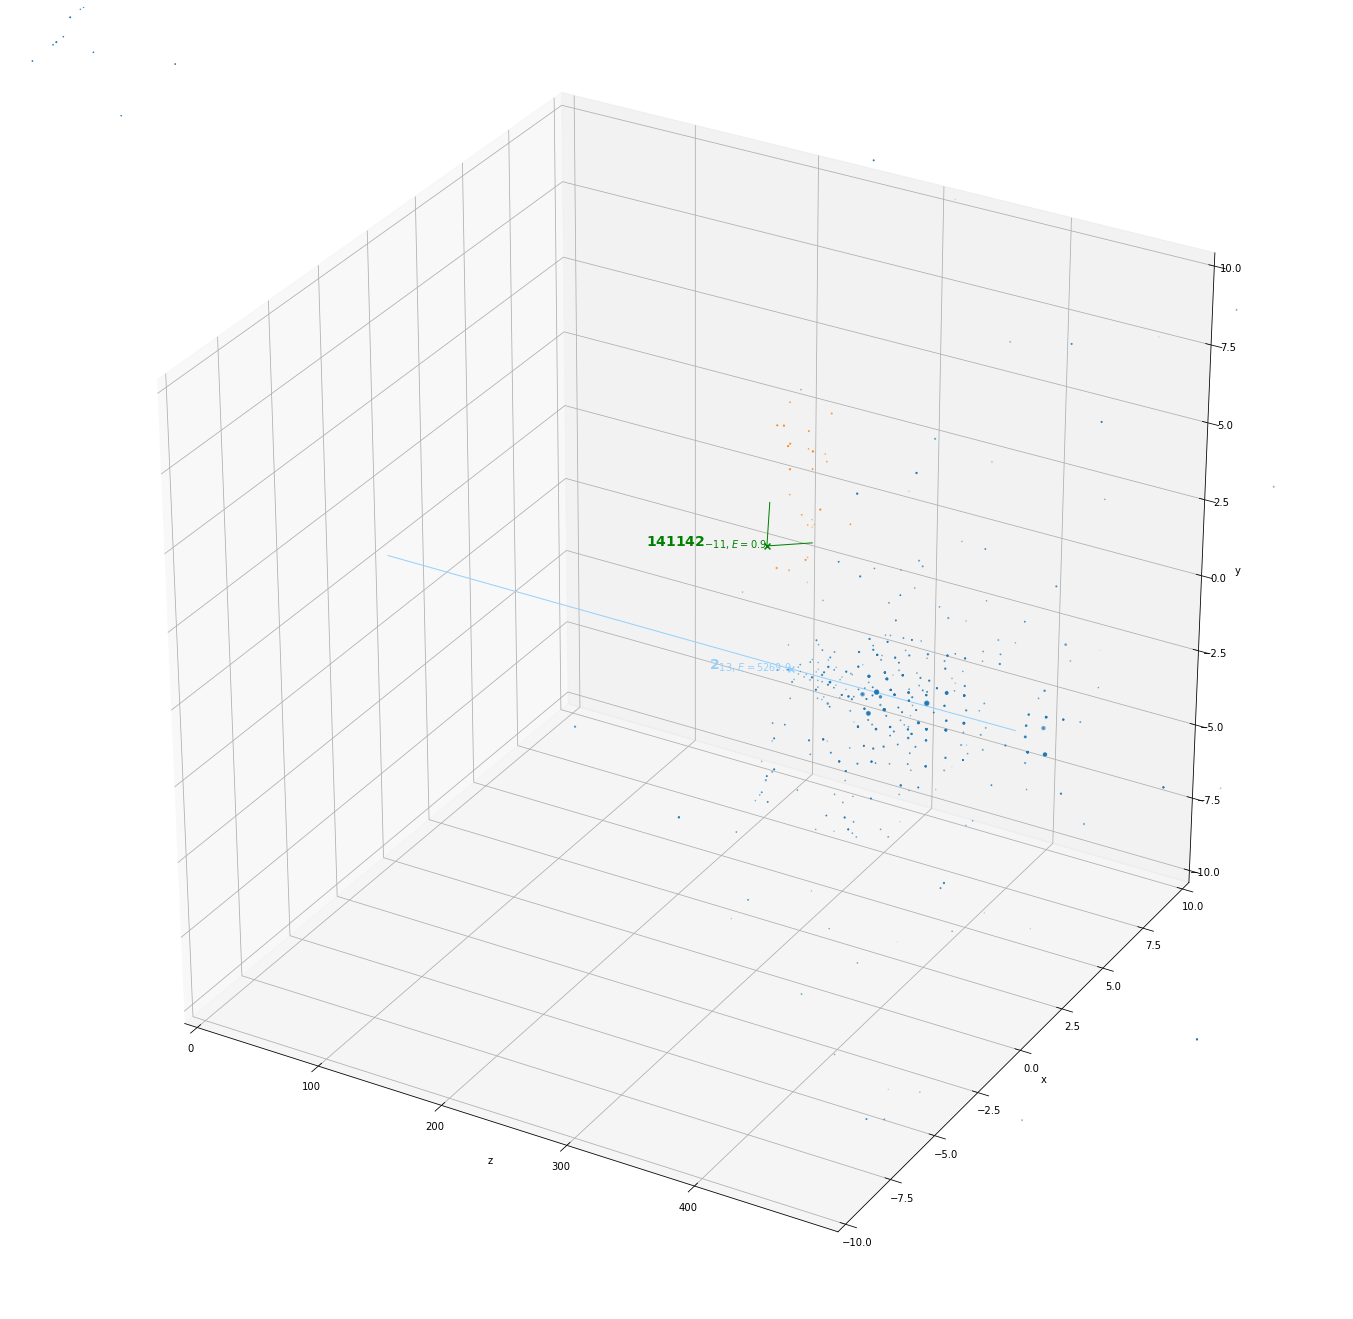

In [34]:
def merging_algo(node):
    clusters = []
    # First clear any previous clustering
    for track in node.traverse():
        if hasattr(track, 'cluster'): del track.cluster
    for track in node.traverse():
        if not track.crossedBoundary: continue

        if not track.parent:
            # If a track is parentless it must be primary; always
            # give these their own cluster
            cluster = Cluster(track)
            clusters.append(cluster)
            continue
            
        # Electron and photon rules
        if abs(track.pdgid) in [22, 11]:
            if track.energy > .8:
                # Split into new cluster
                cluster = Cluster(track)
                clusters.append(cluster)
            else:
                # Merge with parent cluster if too low energy
                merge(track)
                    
merging_algo(root)
trees.plot_node_rotated(root, plot_clusters=True)

# Printing more events: Pions

   INFO:2020-11-24 18:17:28:ntuputils:161 Overwriting cache for <ntuputils.Dataset (1 root files) object at 0x1772e3be0>


   INFO:2020-11-24 18:17:29:ntuputils:171 Cached ~46.4 Mb (20 entries, 53 branches)
   INFO:2020-11-24 18:17:29:ntuputils:128 Using cache


   INFO:2020-11-24 18:17:29:trees:164 Adding <trees.Track 1 E=467.19 (0.000,0.000,-0.000) pdgid=-211 at 0x1872a9c10> as a root
   INFO:2020-11-24 18:17:29:trees:164 Adding <trees.Track 2 E=467.19 (0.000,0.000,-0.000) pdgid=211 at 0x1872a9130> as a root
   INFO:2020-11-24 18:17:30:trees:164 Adding <trees.Track 1 E=284.25 (-0.000,0.000,-0.000) pdgid=-211 at 0x1872a9e80> as a root
   INFO:2020-11-24 18:17:30:trees:164 Adding <trees.Track 2 E=284.25 (-0.000,0.000,-0.000) pdgid=211 at 0x1872a9fa0> as a root
   INFO:2020-11-24 18:17:31:trees:164 Adding <trees.Track 1 E=426.92 (-0.000,0.000,-0.000) pdgid=-211 at 0x189c22130> as a root
   INFO:2020-11-24 18:17:31:trees:164 Adding <trees.Track 2 E=426.92 (-0.000,0.000,-0.000) pdgid=211 at 0x189c220d0> as a root
   INFO:2020-11-24 18:17:33:trees:164 Adding <trees.Track 1 E=468.10 (0.000,-0.000,-0.000) pdgid=-211 at 0x189e6d880> as a root
   INFO:2020-11-24 18:17:33:trees:164 Adding <trees.Track 2 E=468.10 (0.000,-0.000,-0.000) pdgid=211 at 0x189

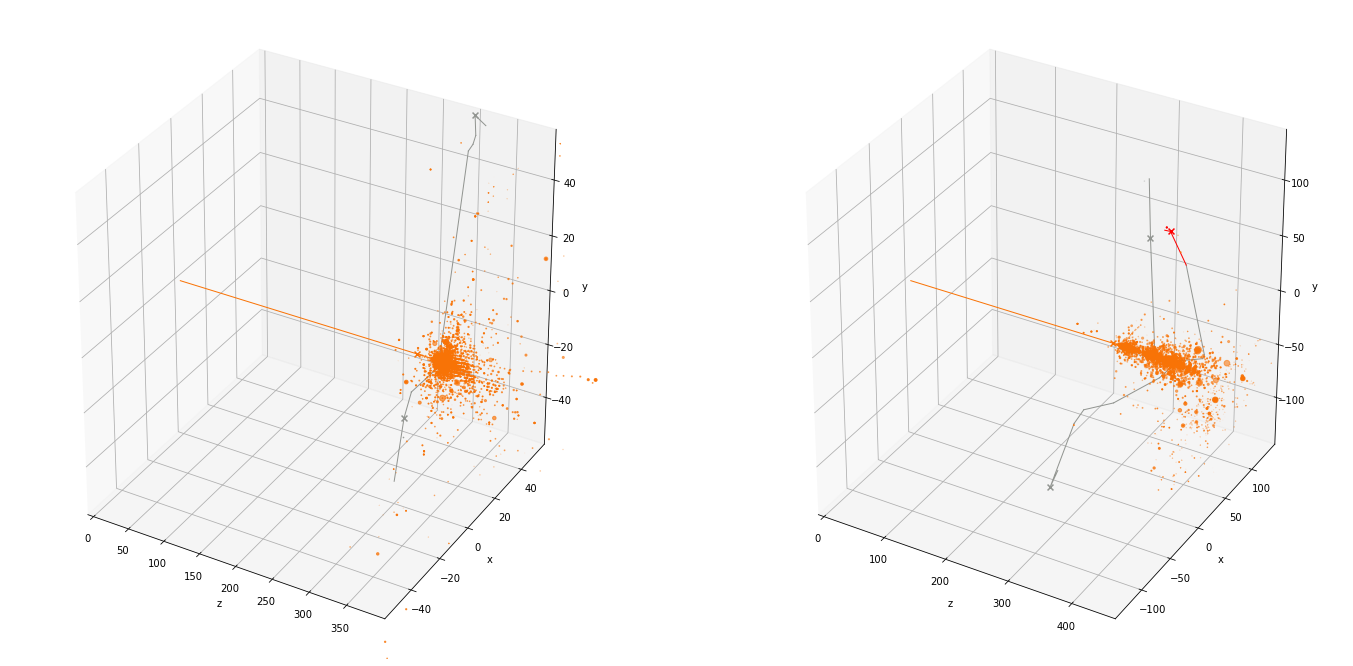

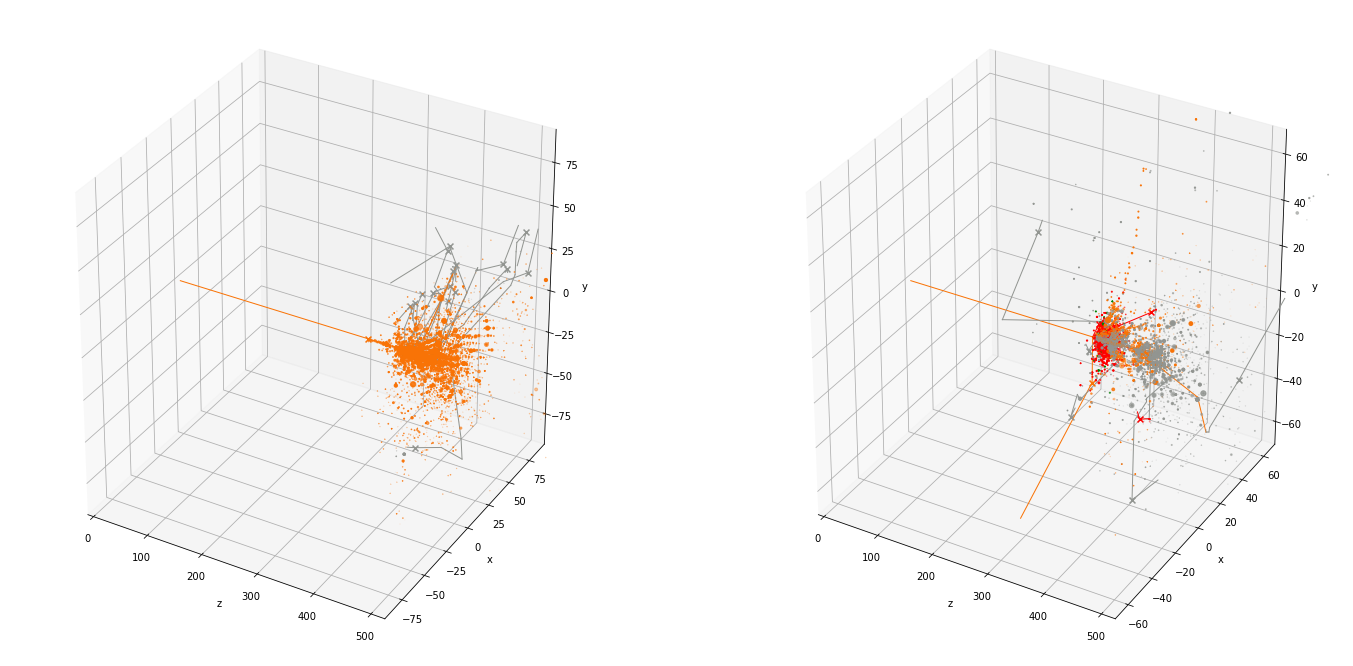

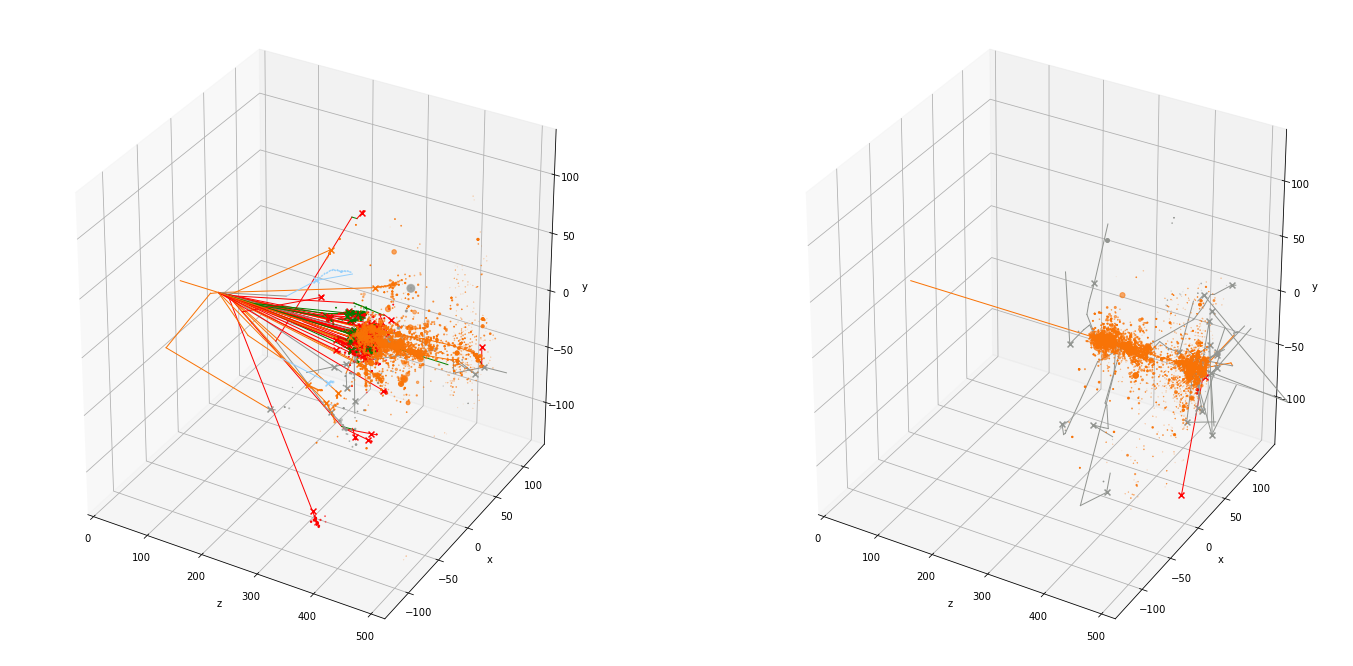

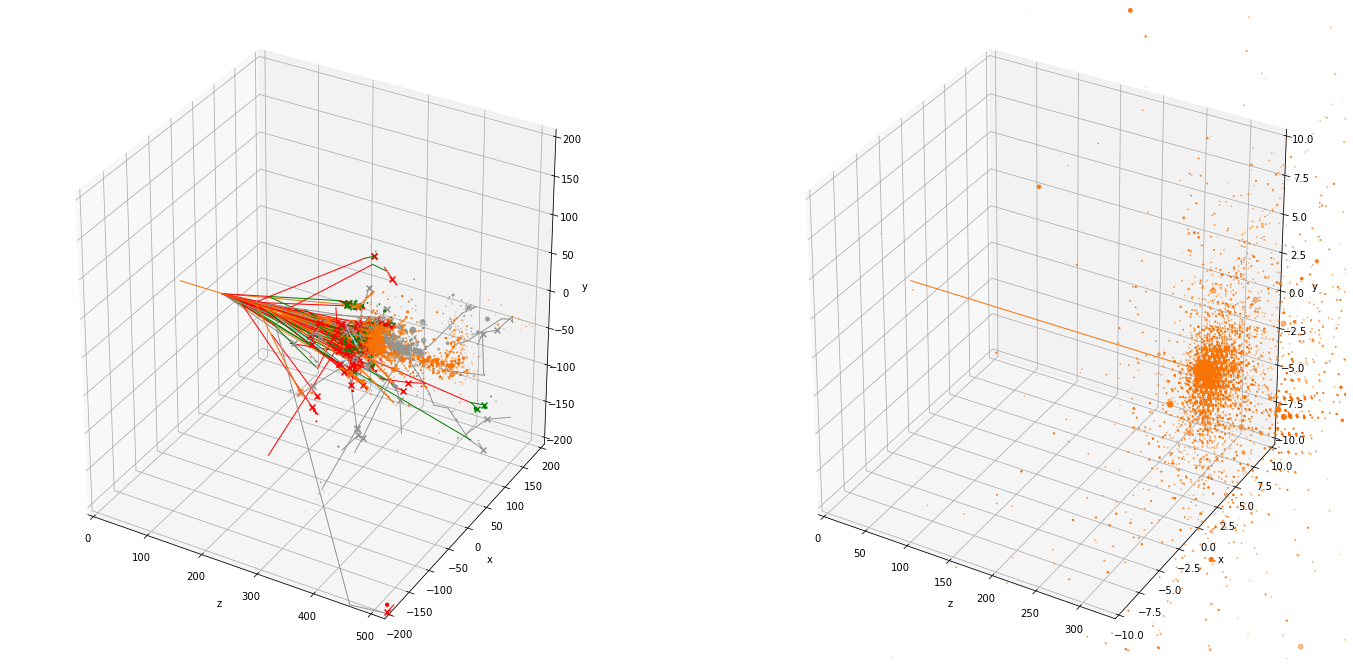

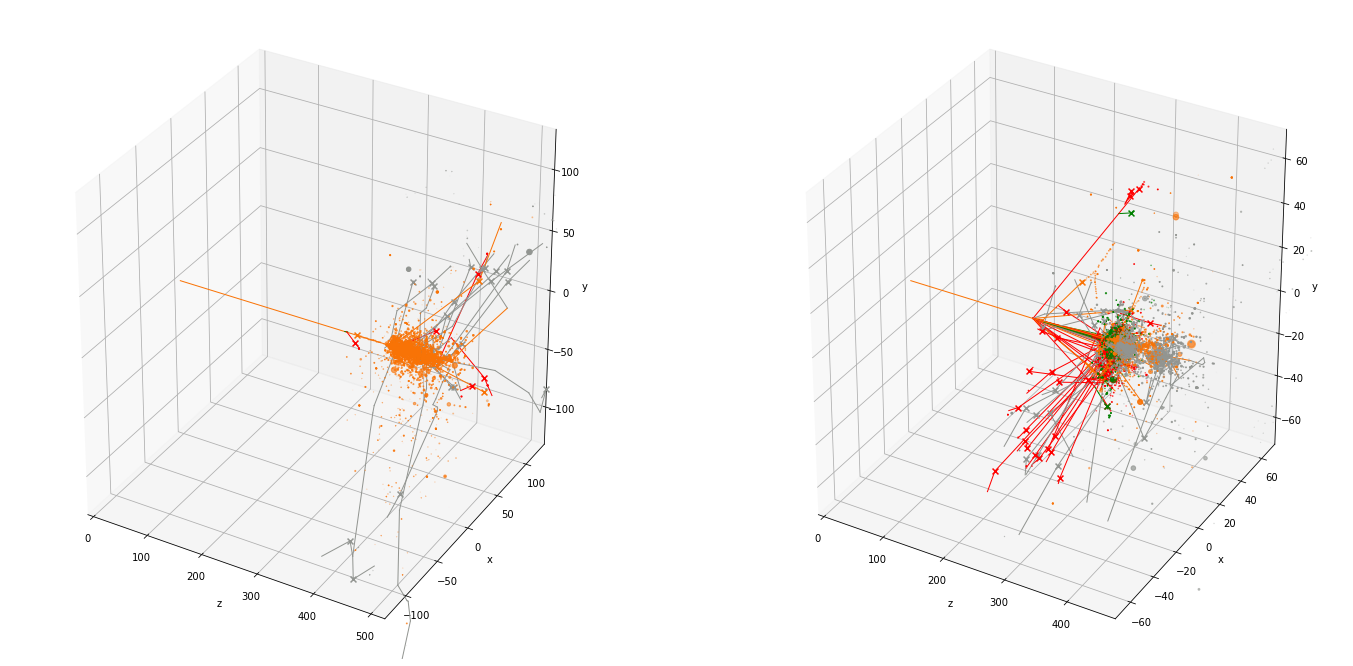

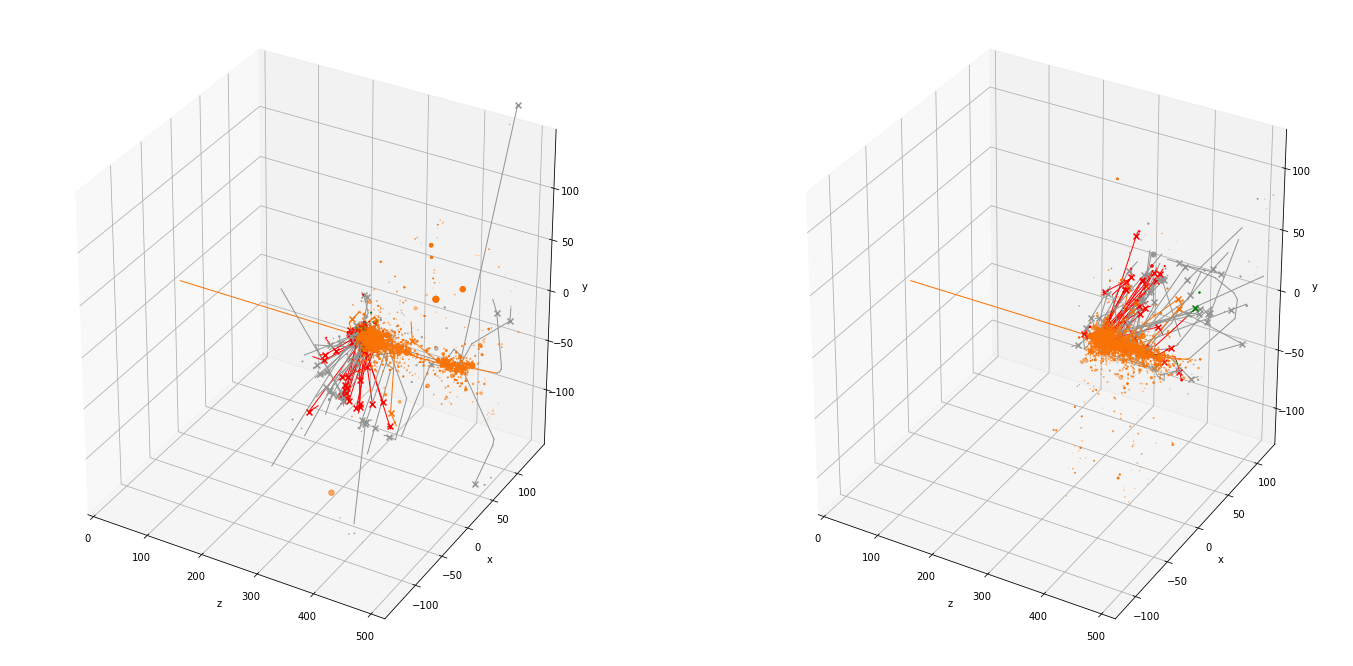

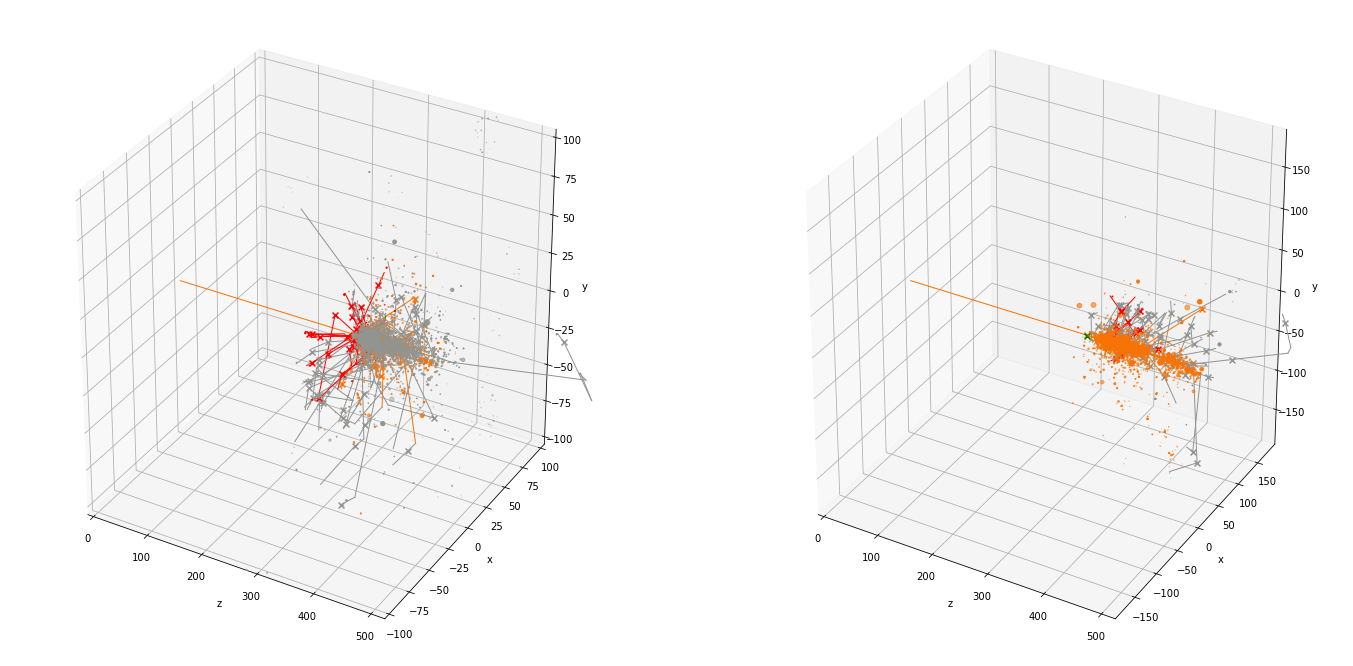

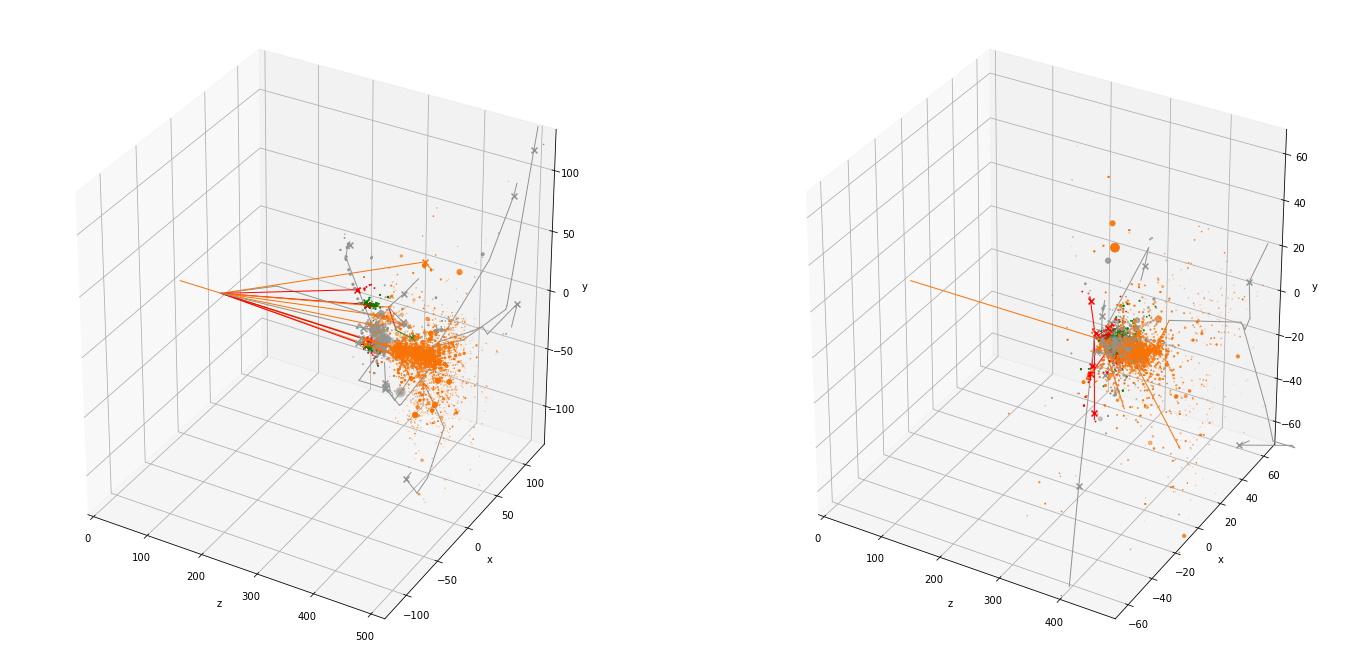

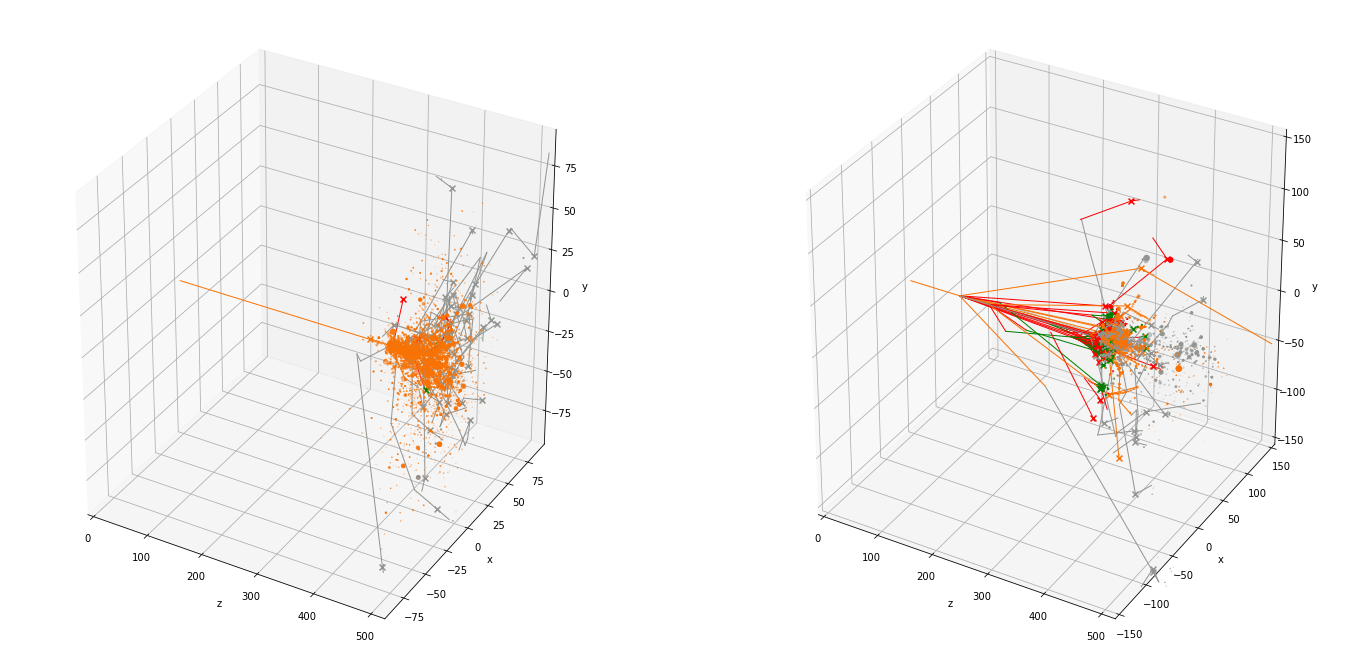

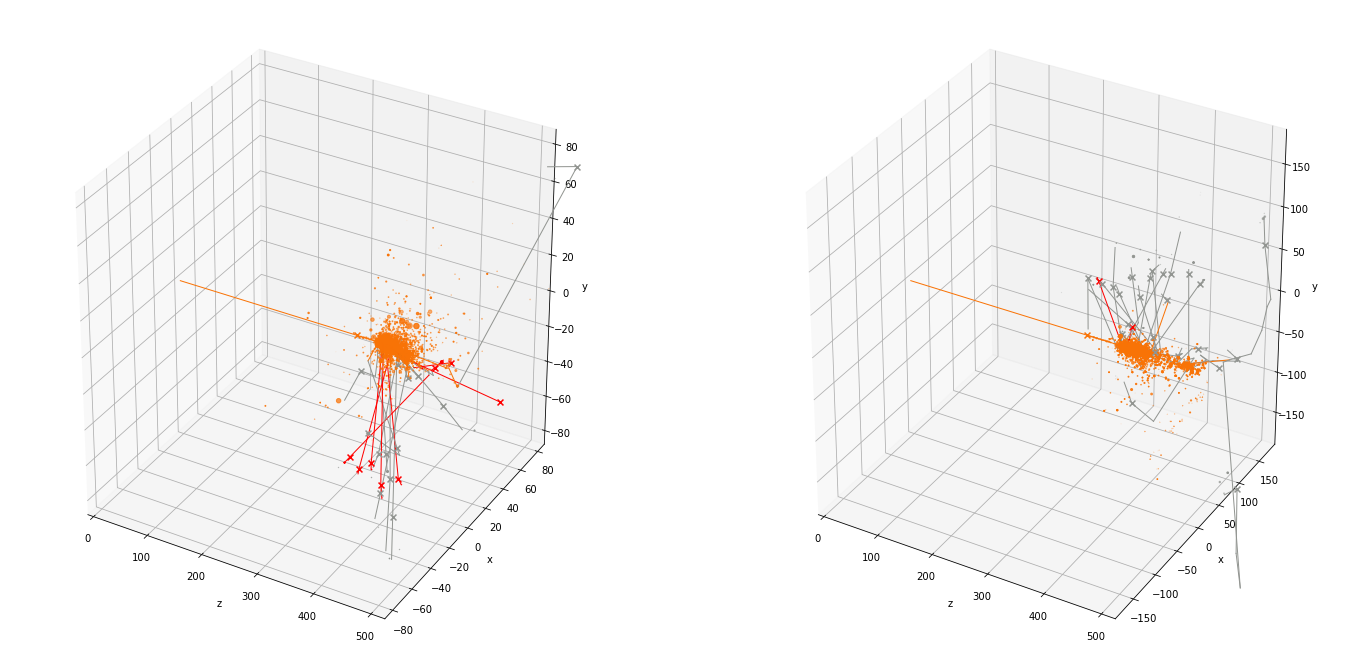

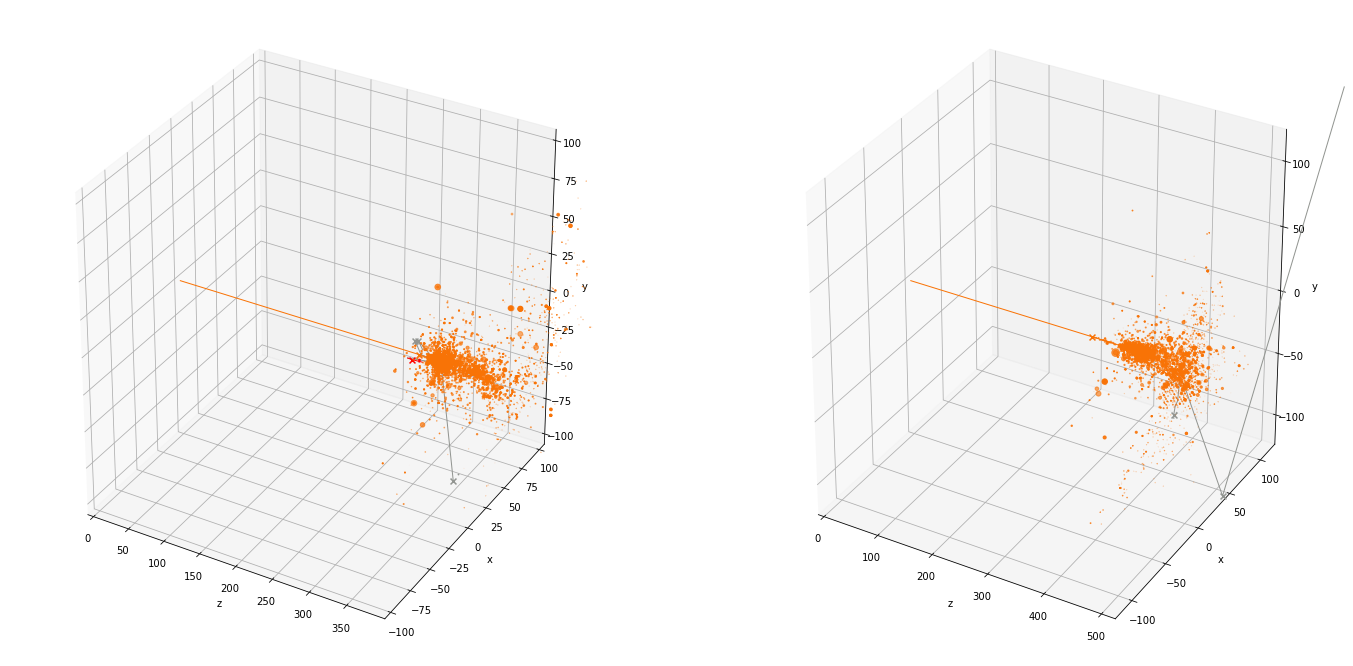

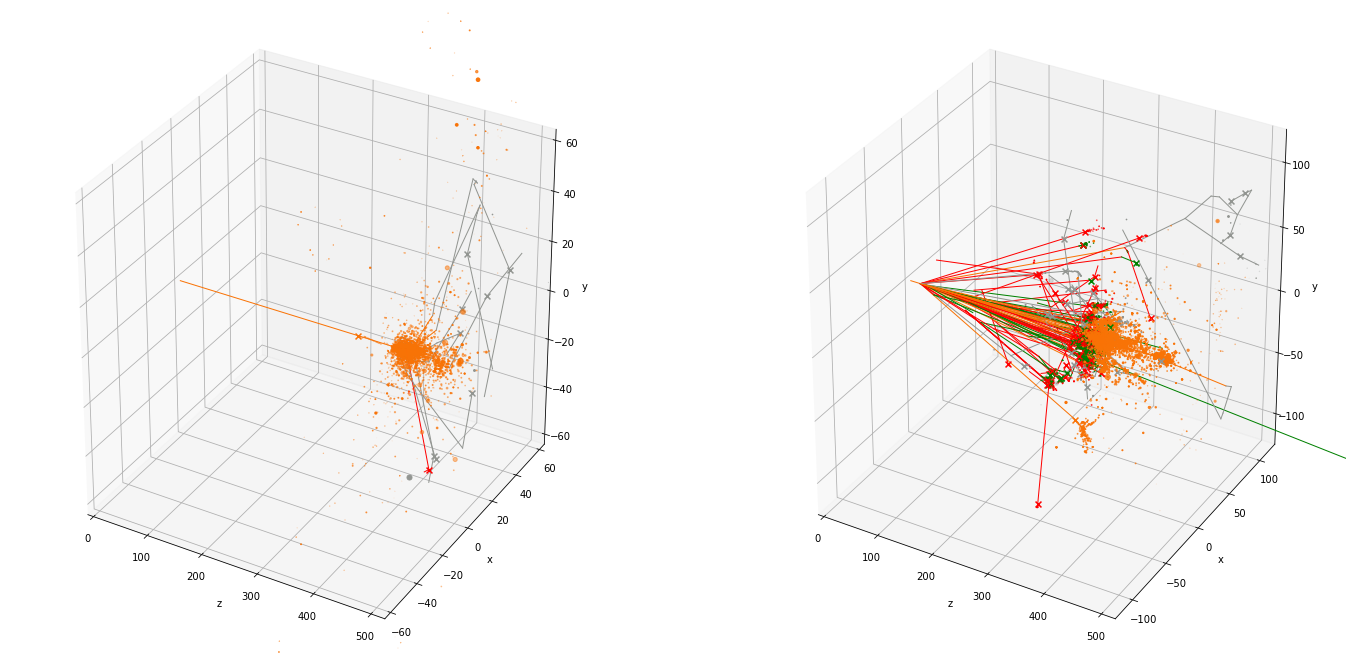

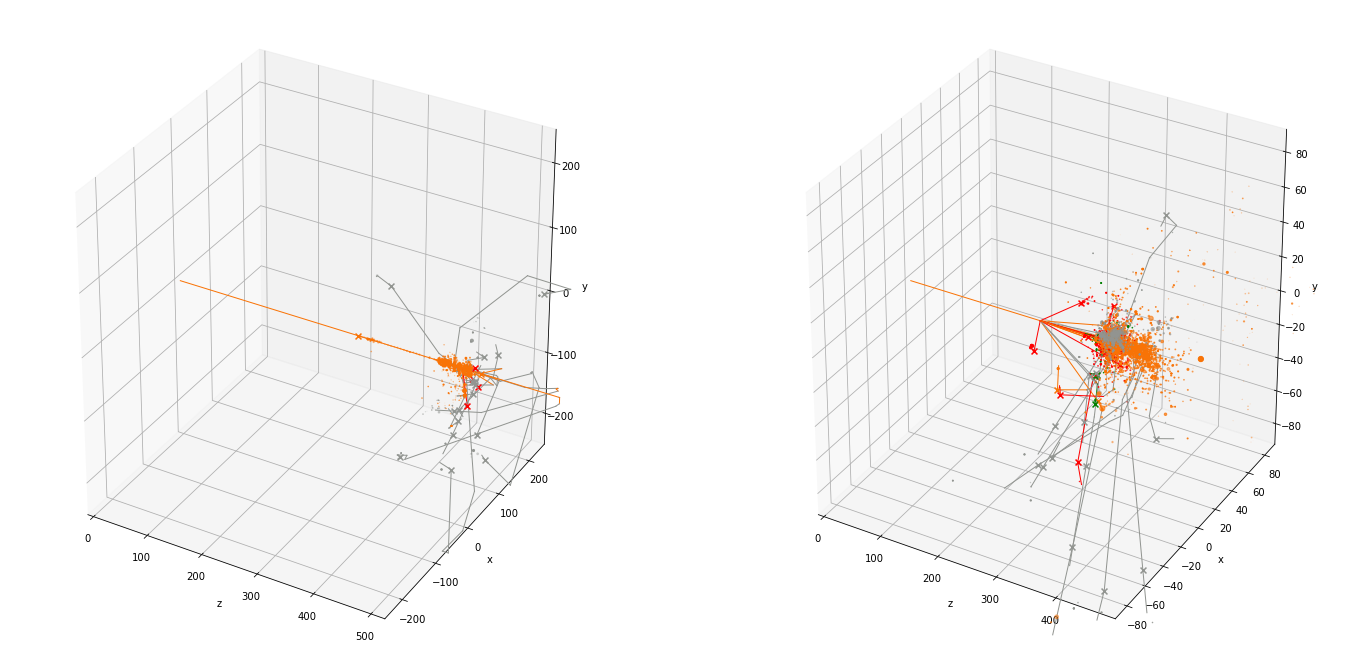

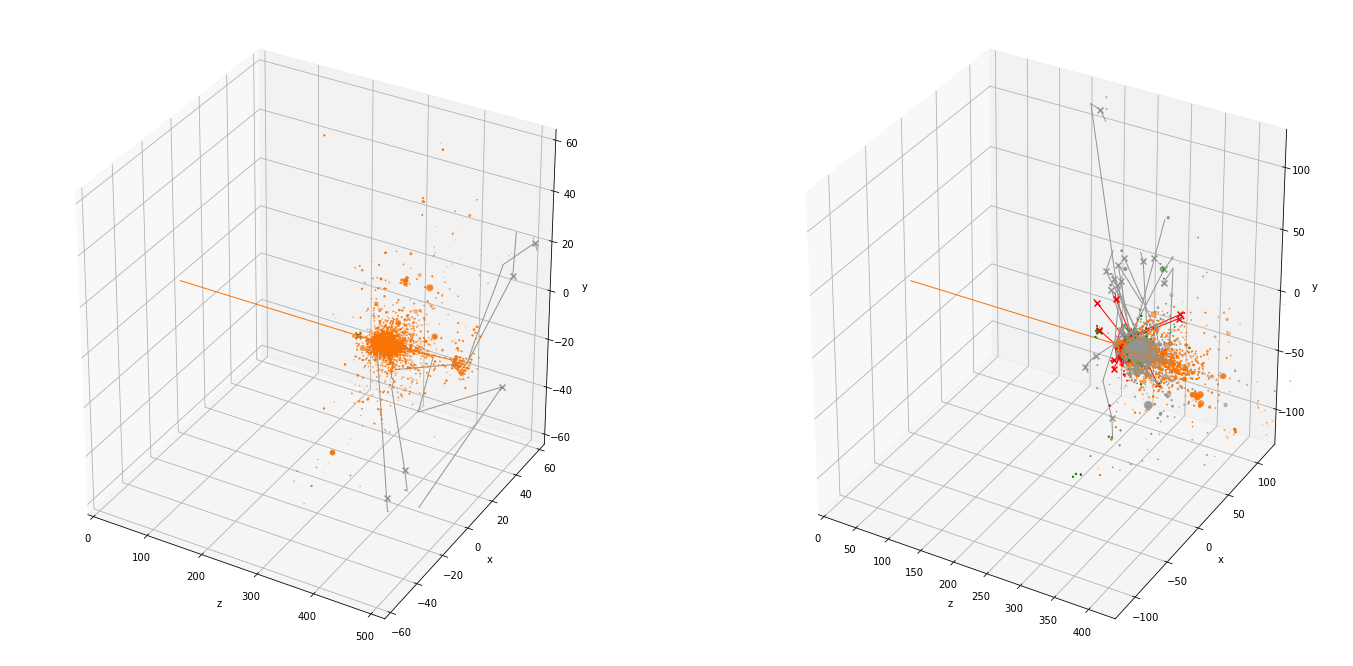

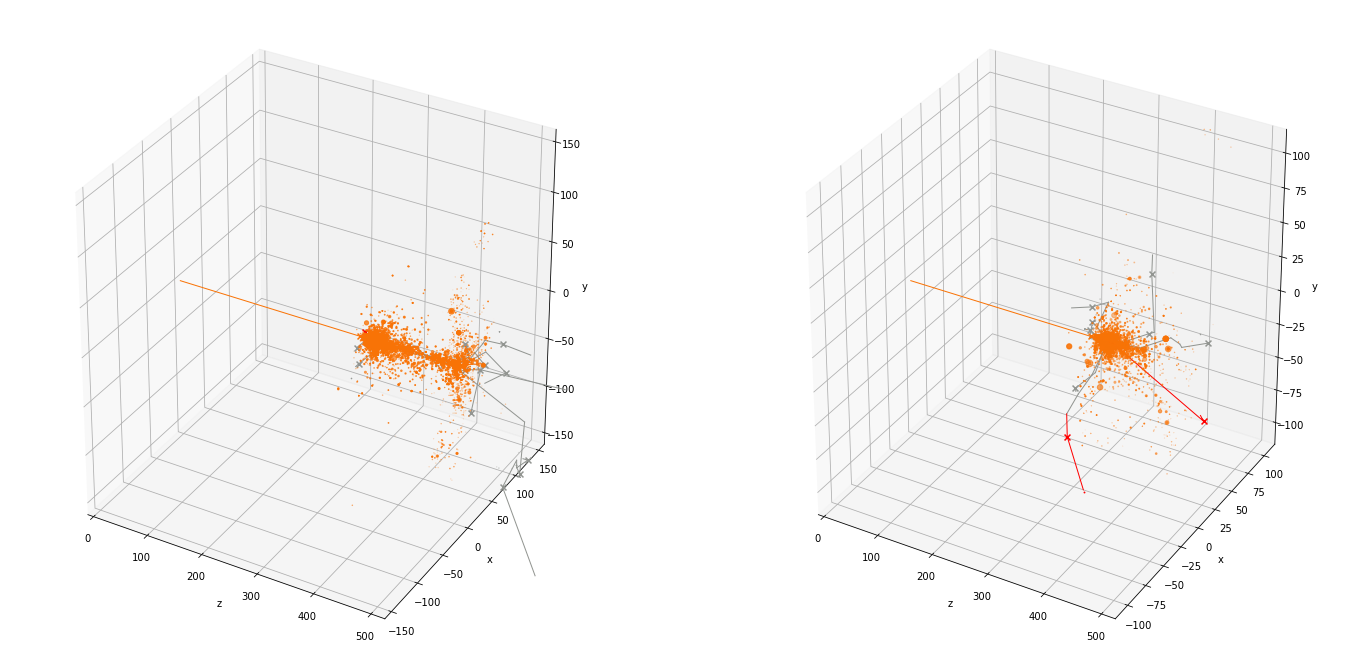

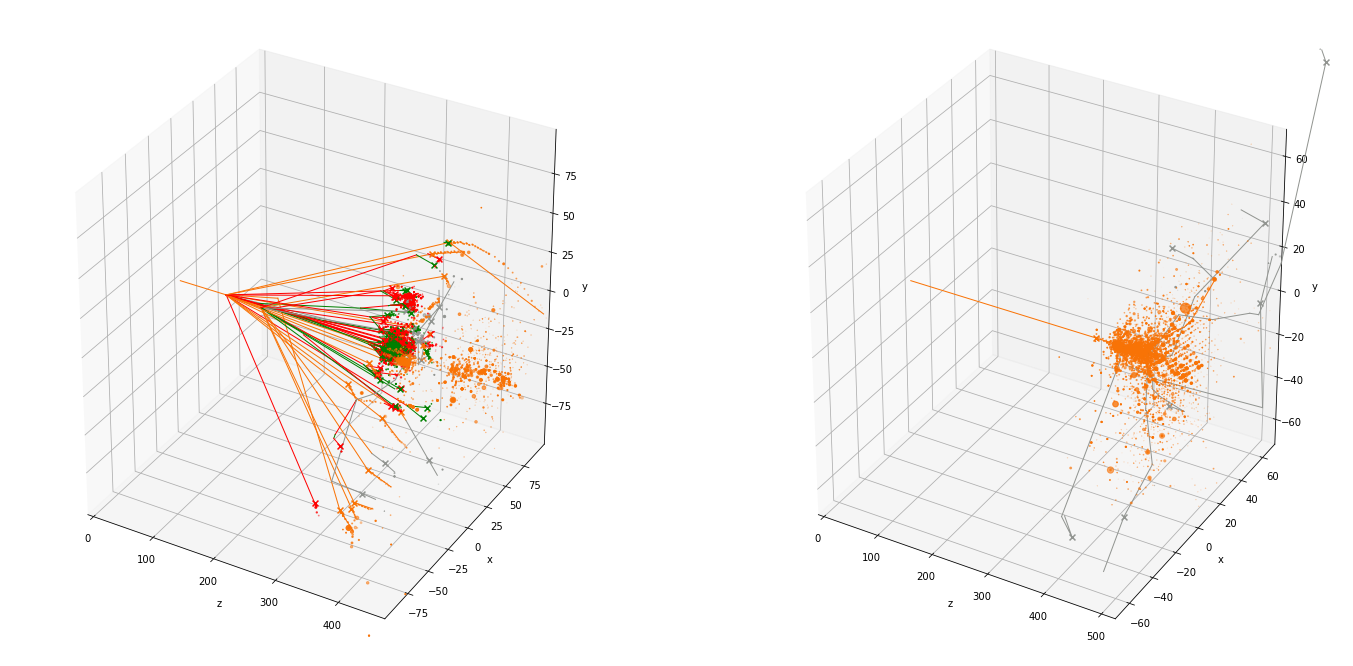

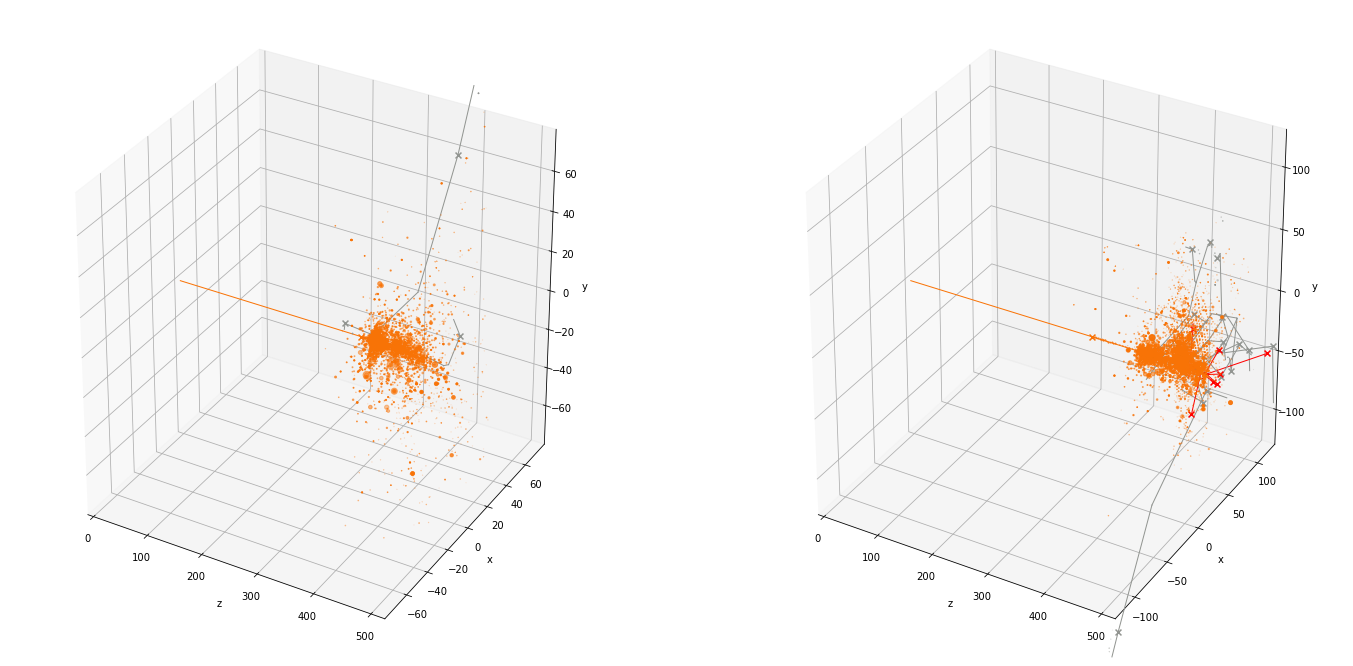

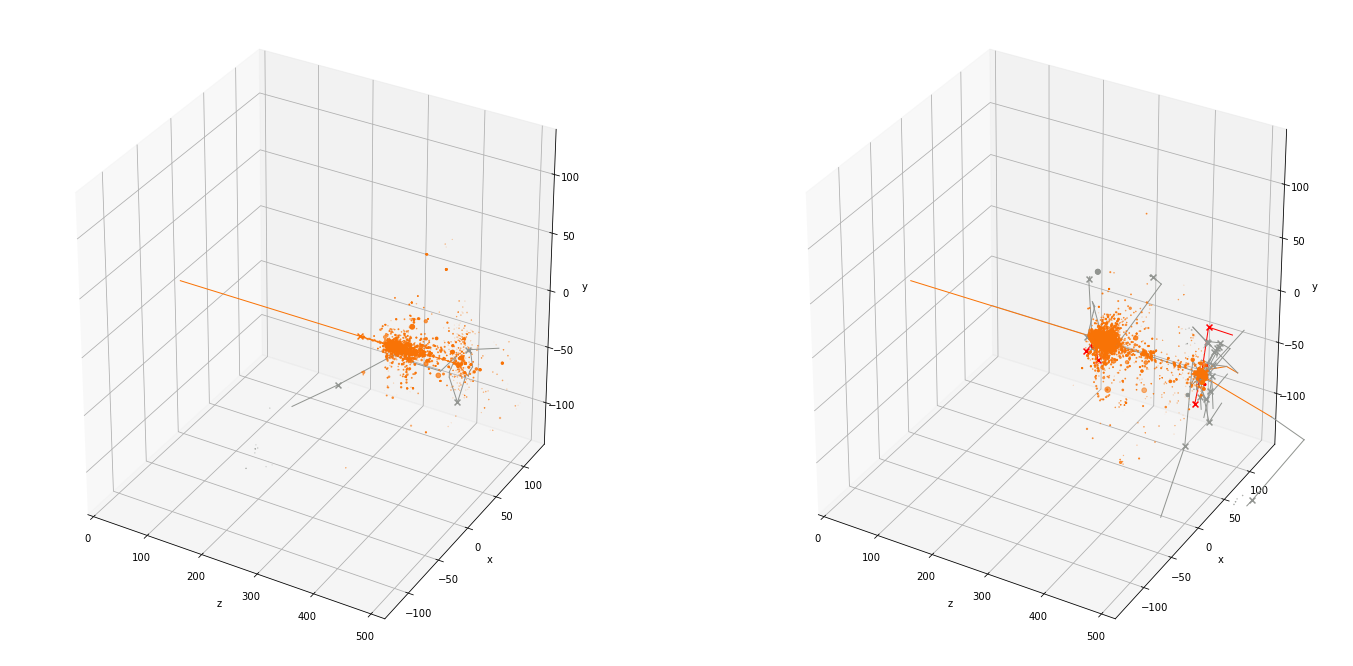

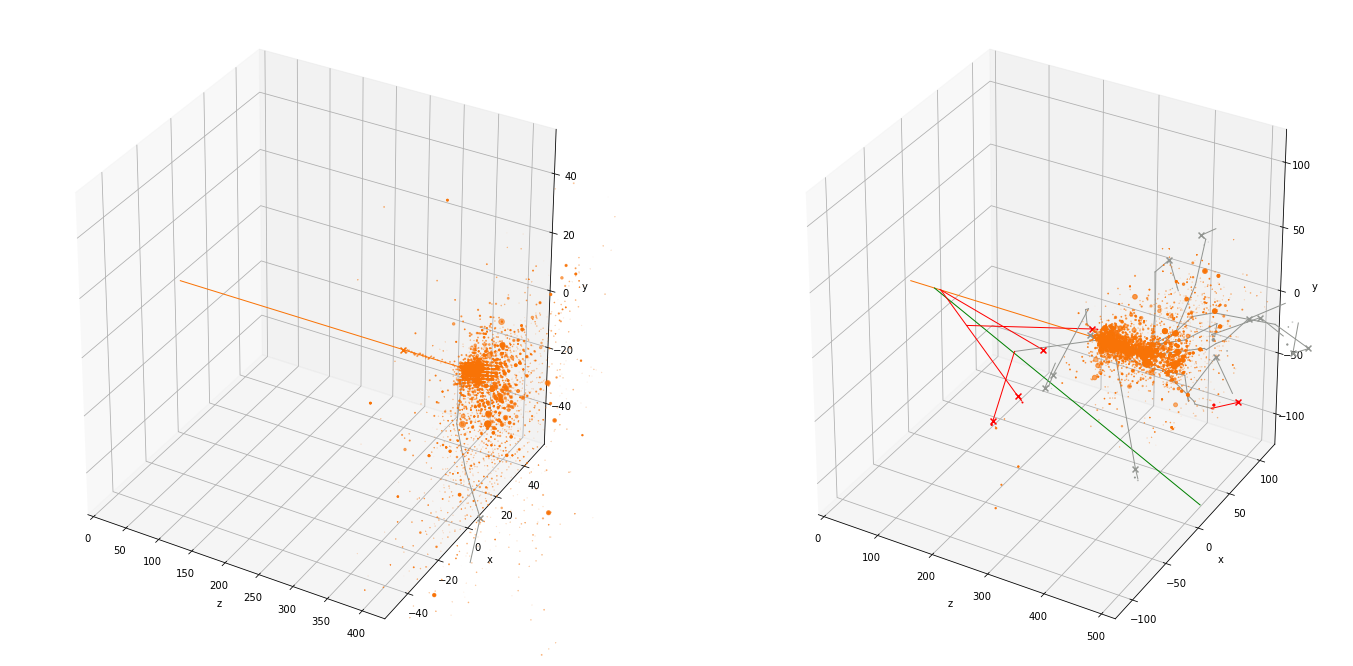

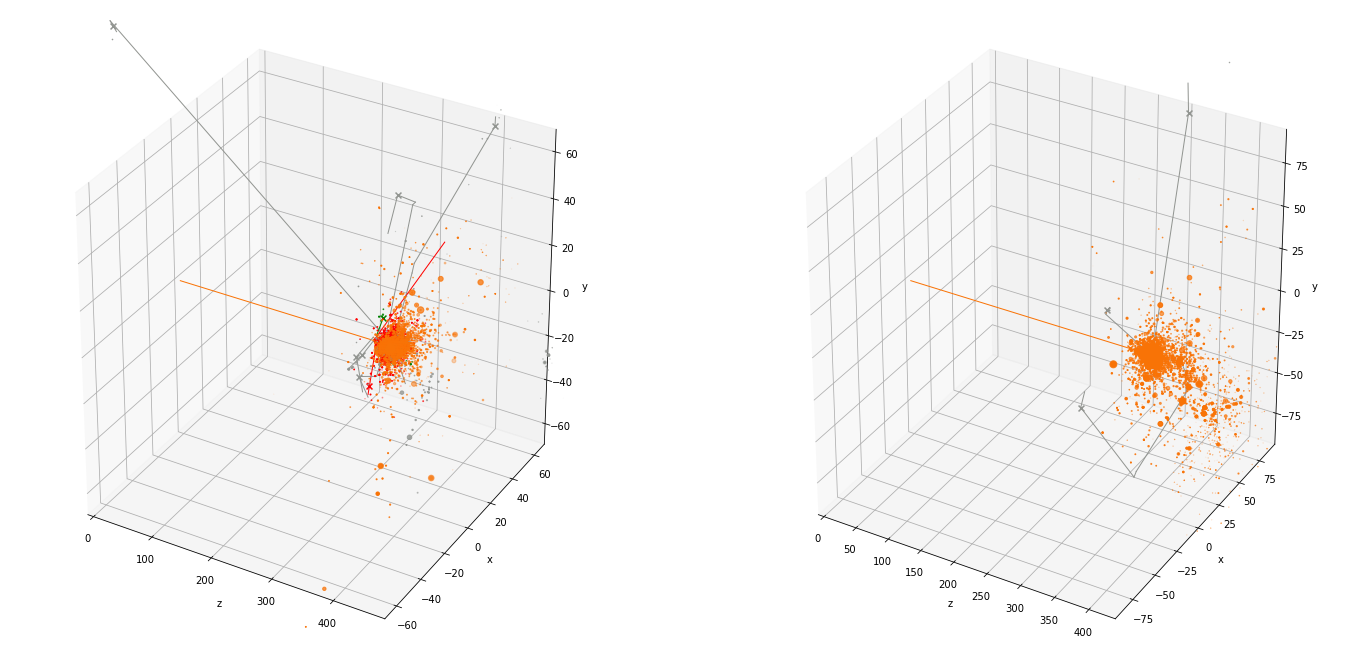

In [25]:
labels = False
def do():
    for event in ntuputils.iter_events('event1001_pdgid211_100GeV_Nov24_finecalo_numEvent20_numEvent20.root'):
        roots = trees.build_tree(event)
        fig = plt.figure(figsize=(24,12))
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')
        trees.plot_node_rotated(roots[0], labels=labels, ax=ax1)
        trees.plot_node_rotated(roots[1], labels=labels, ax=ax2)
do()

# Trying trimming

2 E=5269.00 pdg=13 nhits=878 X
__13 E=2.08 pdg=11  
____139656 E=0.04 pdg=22 nhits=1 X
____139659 E=0.05 pdg=22 nhits=1 X
____139660 E=0.87 pdg=22  
______141142 E=0.86 pdg=-11 nhits=2 X
________141145 E=0.15 pdg=22  
__________142156 E=0.11 pdg=11 nhits=2 X
____________142207 E=0.05 pdg=22 nhits=1 X
__________142157 E=0.04 pdg=-11 nhits=1 X
________141149 E=0.04 pdg=22 nhits=2 X
________141150 E=0.44 pdg=22  
__________141429 E=0.26 pdg=11 nhits=7 X
____________141677 E=0.03 pdg=22 nhits=3 X
____________141678 E=0.04 pdg=22 nhits=1 X
__________141430 E=0.18 pdg=-11 nhits=11 X
________141155 E=0.02 pdg=22 nhits=3 X
________141156 E=0.12 pdg=22 nhits=4 X
____139661 E=1.08 pdg=11  
______139663 E=0.05 pdg=22 nhits=1 X
______139696 E=0.29 pdg=22 nhits=7 X
______139704 E=0.60 pdg=22  
________139710 E=0.10 pdg=11 nhits=1 X
________139711 E=0.49 pdg=-11 nhits=12 X
__________139714 E=0.03 pdg=22 nhits=2 X
__________139715 E=0.14 pdg=22 nhits=5 X
__________139717 E=0.10 pdg=22  
____________1

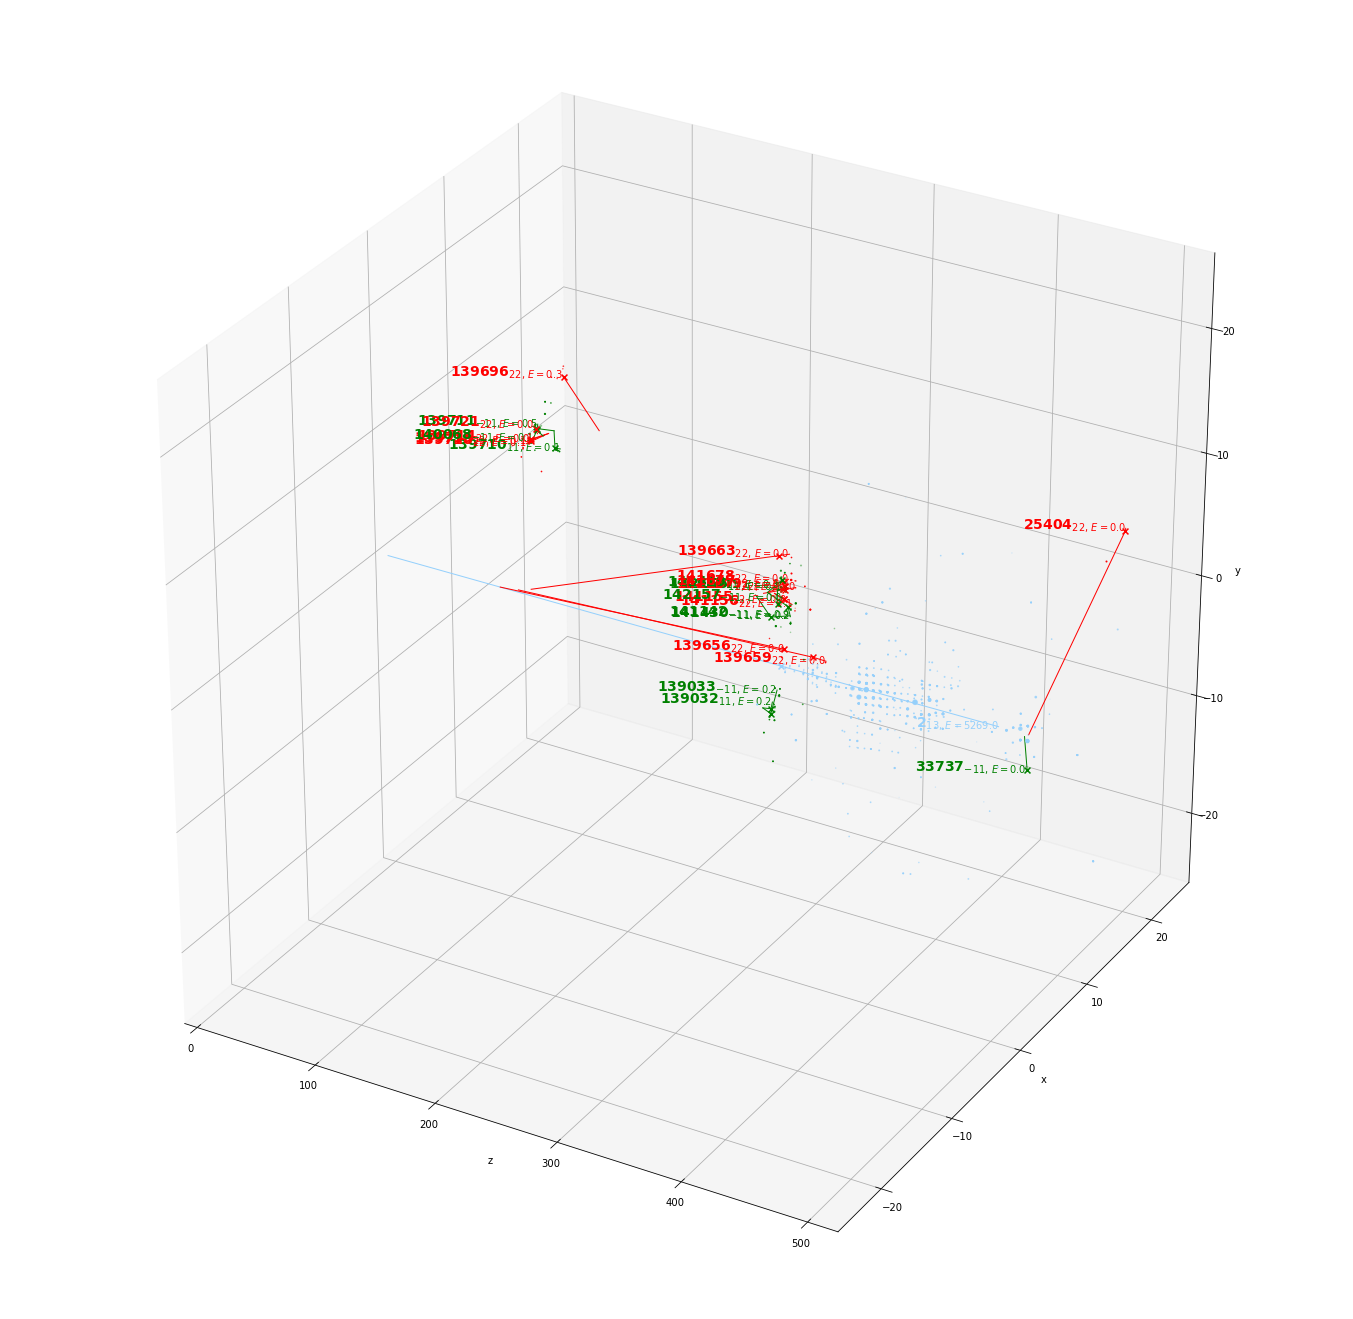

In [109]:
importlib.reload(trees)
trimmed_root = trees.trim_tree(root)
trimmed_root
trees.print_tree(root)
print()
trees.print_tree(trimmed_root)
trees.plot_node_rotated(trimmed_root, labels=True)